# **Major Project - B11 **

## **Exploratory Data Analysis - Sports**

*Dataset category: Indian Premier League*

![title](img1.jpg)

Aim:  

● To perform Exploratory Data Analysis on the given dataset - Indian Premier League

● To find out the most successful teams, players and factors
  contributing win or loss of a team.

● To Suggest teams or players a company should endorse for its products.

● To use any tool of your choice like
 (Python/R/Tableau/PowerBI/Excel/SAP/SAS) - I personally used Python.

● Dataset: https://bit.ly/34SRn3b

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **List of variables**
### **Information about some variables used in the Data Set.**
#### **1st "matches" Dataset**
* id: The IPL match id.
* season: The IPL season
* city: The city where the IPL match was held.
* date: The date on which the match was held.
* team1: One of the teams of the IPL match
* team2: The other team of the IPL match
* toss_winner: The team that won the toss
* toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
* result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
* dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
* winner: The winner of the match.
* win_by_runs: Provides the runs by which the team batting first won
* win_by_wickets: Provides the number of wickets by which the team batting second won.
* player_of_match: The outstanding player of the match.
* venue: The venue where the match was hosted.
* umpire1: One of the two on-field umpires who officiate the match.
* umpire2: One of the two on-field umpires who officiate the match.
* umpire3: The off-field umpire who officiates the match
#### **2nd "deliveries" Dataset**
* match_id: Unique Identifier for a match
* inning: Match innings - 1st innings/2nd innings
* batting_team: Name of the batting team
* bowling_team: Name of the bowling team
* over: Current over
* ball: Current ball of the over
* batsman: Name of the batsman on strike
* non_striker: Name of the batsman on non-striker's end
* bowler: Name of the bowler
* is_super_over: Is this a super-over (0 or 1)
* wide_runs: Runs given as wide
* bye_runs: Runs given as bye
* legbye_runs: Runs given as leg-bye
* noball_runs: Runs given as no-ball
* penalty_runs: Runs given as penalty
* batsman_runs: Runs scored by the batsman
* extra_runs: Total extra runs (Wide, Bye, No-ball, Penalty)
* total_runs: Total runs from the ball (extra_runs, batsman_runs)
* player_dismissed: Name of the player dismissed (If out)
* dismissal_kind: How the player was dismissed (If out)
* fielder: Fielder involved in the dismissal (If any)

# **2. Data Read**

* Read First Dataset

In [4]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

* Read Second Dataset

In [6]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# **3. Data Cleaning**

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
pip install missingno

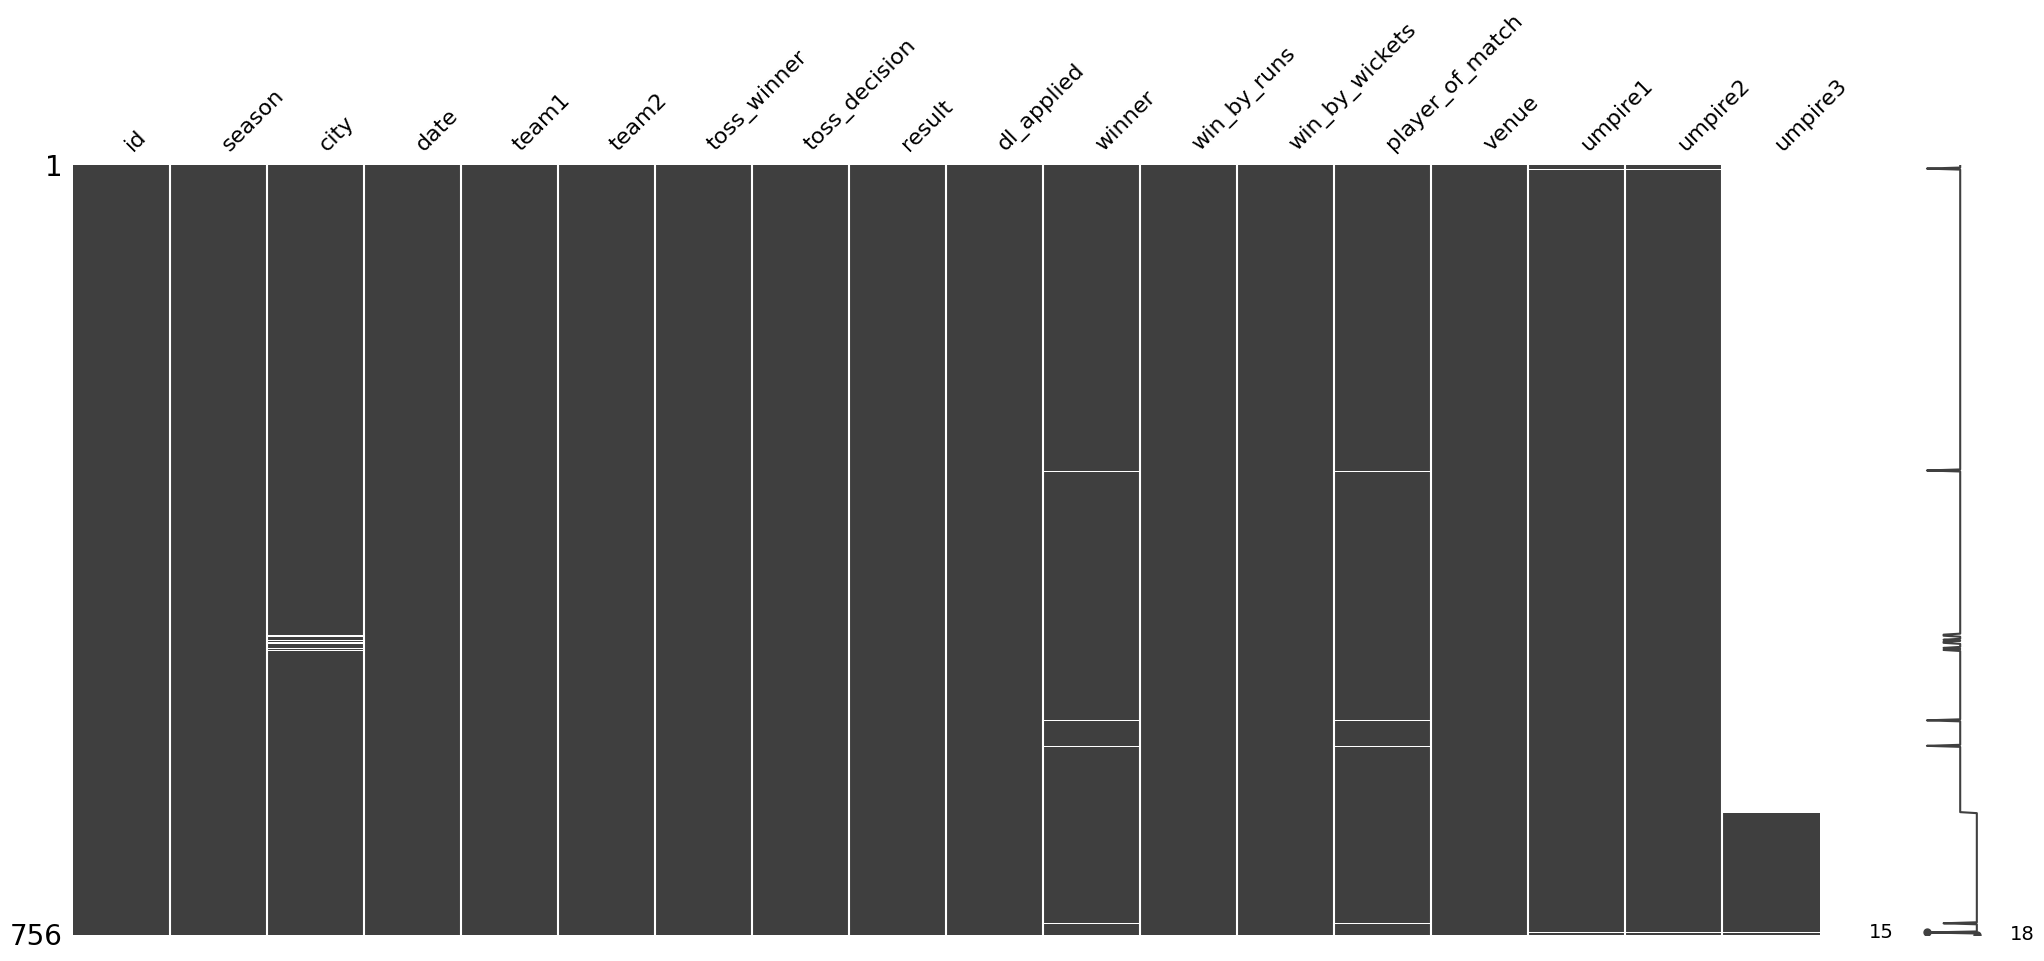

In [10]:
 # Observation of Missing Value of Data
import missingno as msno

msno.matrix(matches);

In [11]:
#Percentage of NAN Values 
per_Nan = [(c, matches[c].isna().mean()*100) for c in matches]
per_Nan = pd.DataFrame(per_Nan, columns=["column_name", "Percentage"])

In [12]:
per_Nan

,column_name,Percentage
0,id,0.000000
1,season,0.000000
2,city,0.925926
3,date,0.000000
4,team1,0.000000
5,team2,0.000000
6,toss_winner,0.000000
7,toss_decision,0.000000
8,result,0.000000
9,dl_applied,0.000000


* The variable 'umpire3' was dropped because it contains too much missing data.

In [13]:
matches.drop('umpire3',axis = 1, inplace=True)

In [14]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**player_dismissed:** Name of the player dismissed (If out)
**dismissal_kind:** How the player was dismissed (If out)
**fielder:** Fielder involved in the dismissal (If any)
* It is normal for these features to contain missing data. Because not every player may have taken these actions.

In [15]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

* 'Rising Pune Supergiant' and 'Rising Pune Supergiants' These two are the same statement.

In [19]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [20]:
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [21]:
matches.loc[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [22]:
matches['city'].fillna('Dubai', inplace = True)

In [23]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

* 'Bangalore' and 'Bengaluru' These two are the same statement.

In [24]:
matches.replace('Bengaluru','Bangalore', inplace = True)

In [25]:
deliveries.replace('Bengaluru','Bangalore', inplace = True)

# **3. Data Visualization**

* **1. Number of matches in the season.**

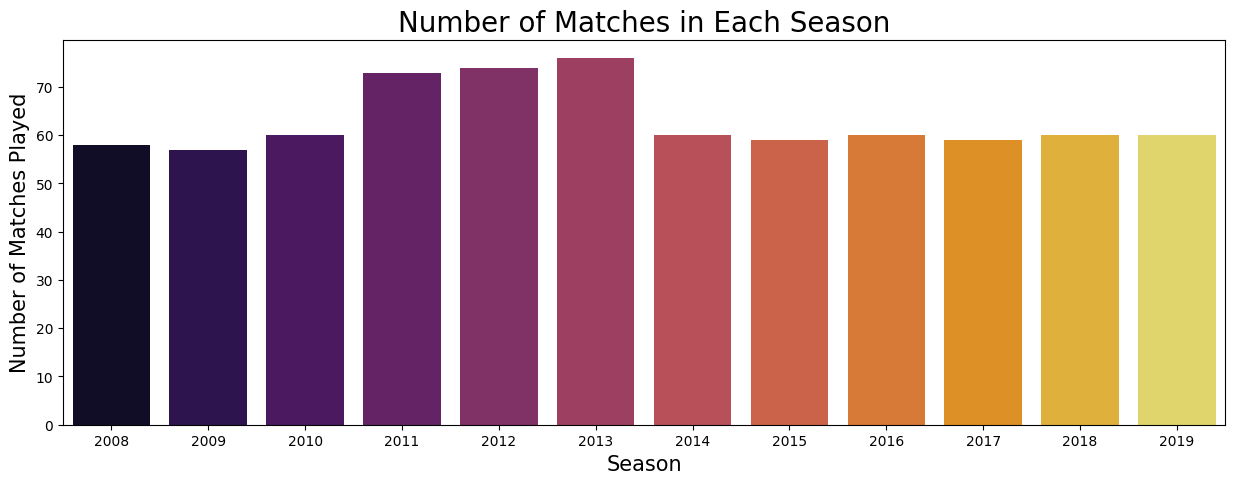

In [26]:
# lets see how many matches are being played every season
plt.subplots(figsize=(15,5))
sns.countplot(x = 'season', data = matches, palette = 'inferno')
plt.xlabel('Season',fontsize=15)
plt.ylabel('Number of Matches Played',fontsize=15)
plt.title('Number of Matches in Each Season',fontsize=20)
plt.show()

* The most matches were played in 2013 and the least in 2009.

* **2. Number of matches played by each team.**

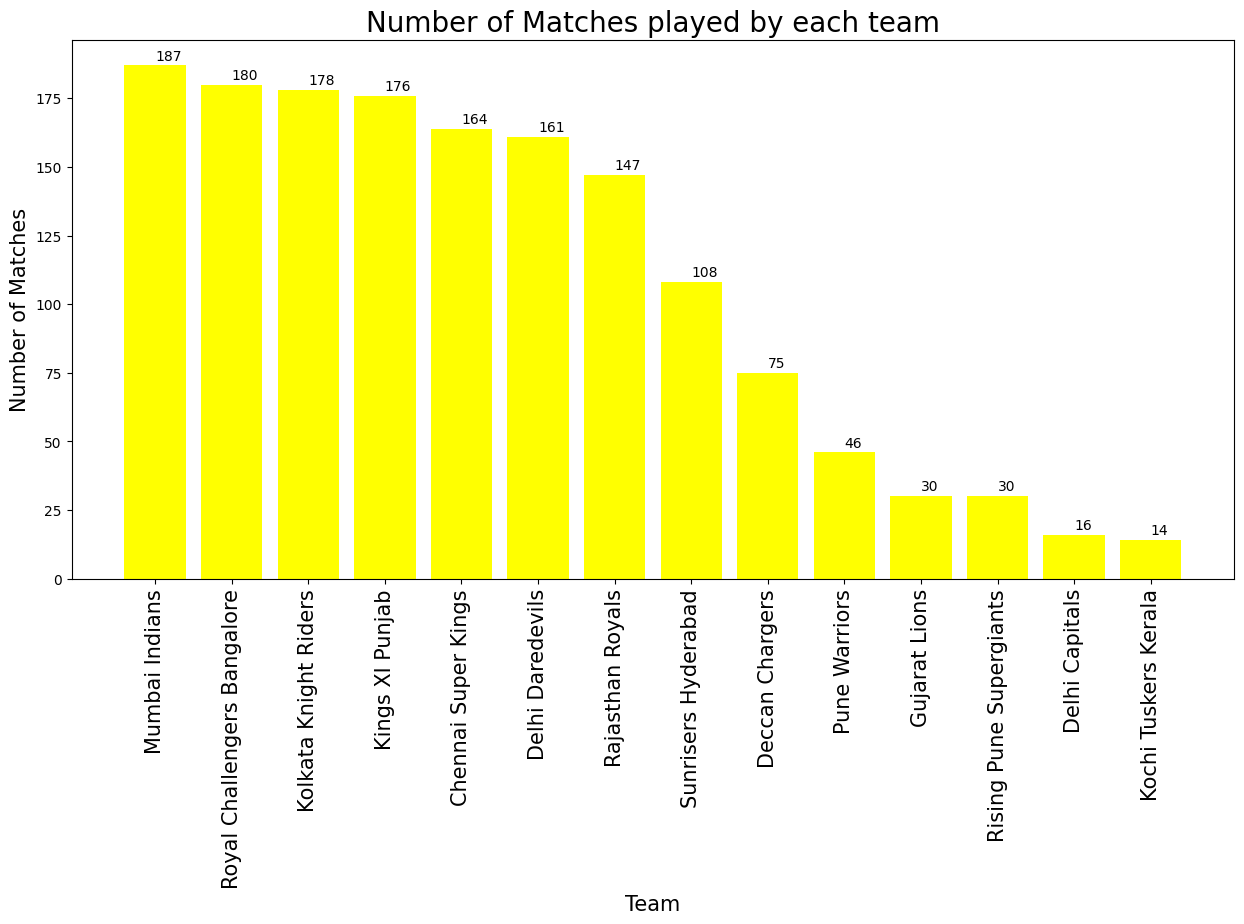

In [27]:
num_matches = pd.concat([matches['team1'], matches['team2']])

num_matches = num_matches.value_counts()

plt.figure(figsize=(15,7))
plt.bar(x=num_matches.index, height=num_matches.values,color='yellow')
plt.title('Number of Matches played by each team',fontsize=20)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xticks(rotation=90,fontsize=15)

for i,v in enumerate(num_matches.values):
    plt.text(x=i, y=v+2, s=v)
    
plt.show()    

* Maximum number of matches played by Mumbai Indians, Royal Challengers Bangalore, Kolkata Knight Riders.

* **3. Total number of wins by each team**

![title](img0.jpg)

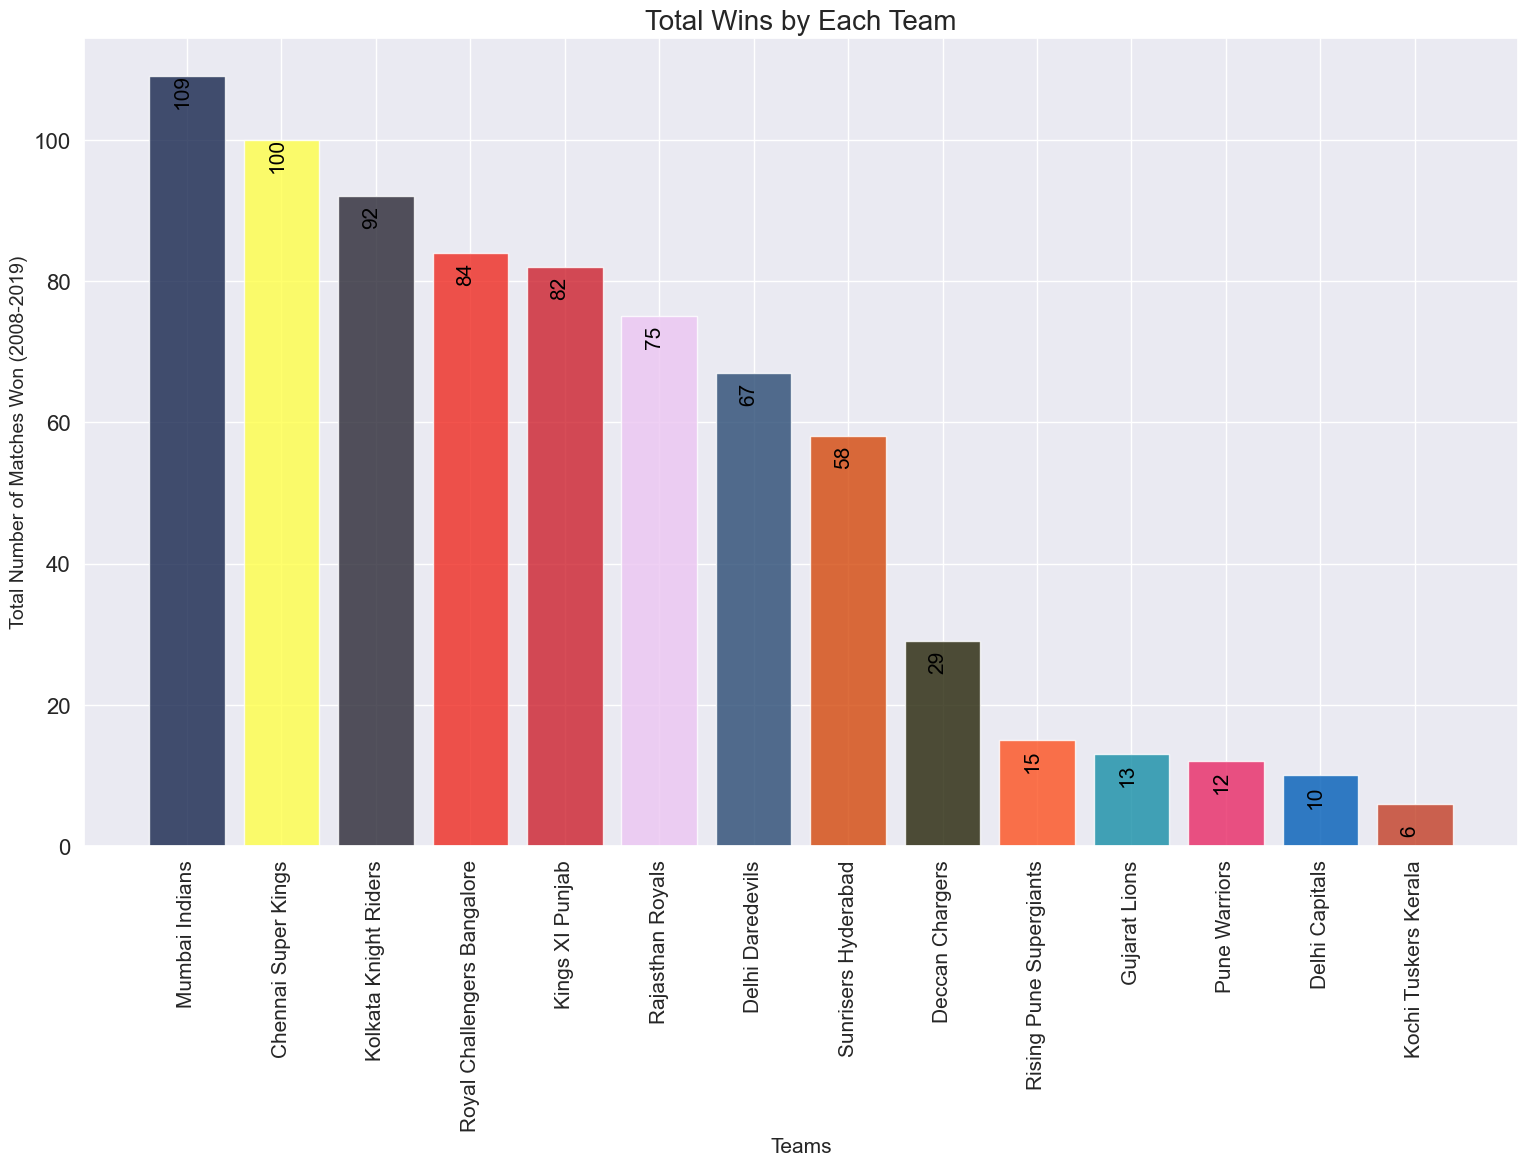

In [28]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(matches['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total Wins by Each Team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total Number of Matches Won (2008-2019)',fontsize=14)
plt.show()

* Maximum number of matches played by Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders.

* **4. Visualization of the total number of matches won by the teams for all seasons.**

In [29]:
winner_by_season = matches.groupby('season')['winner'].value_counts()

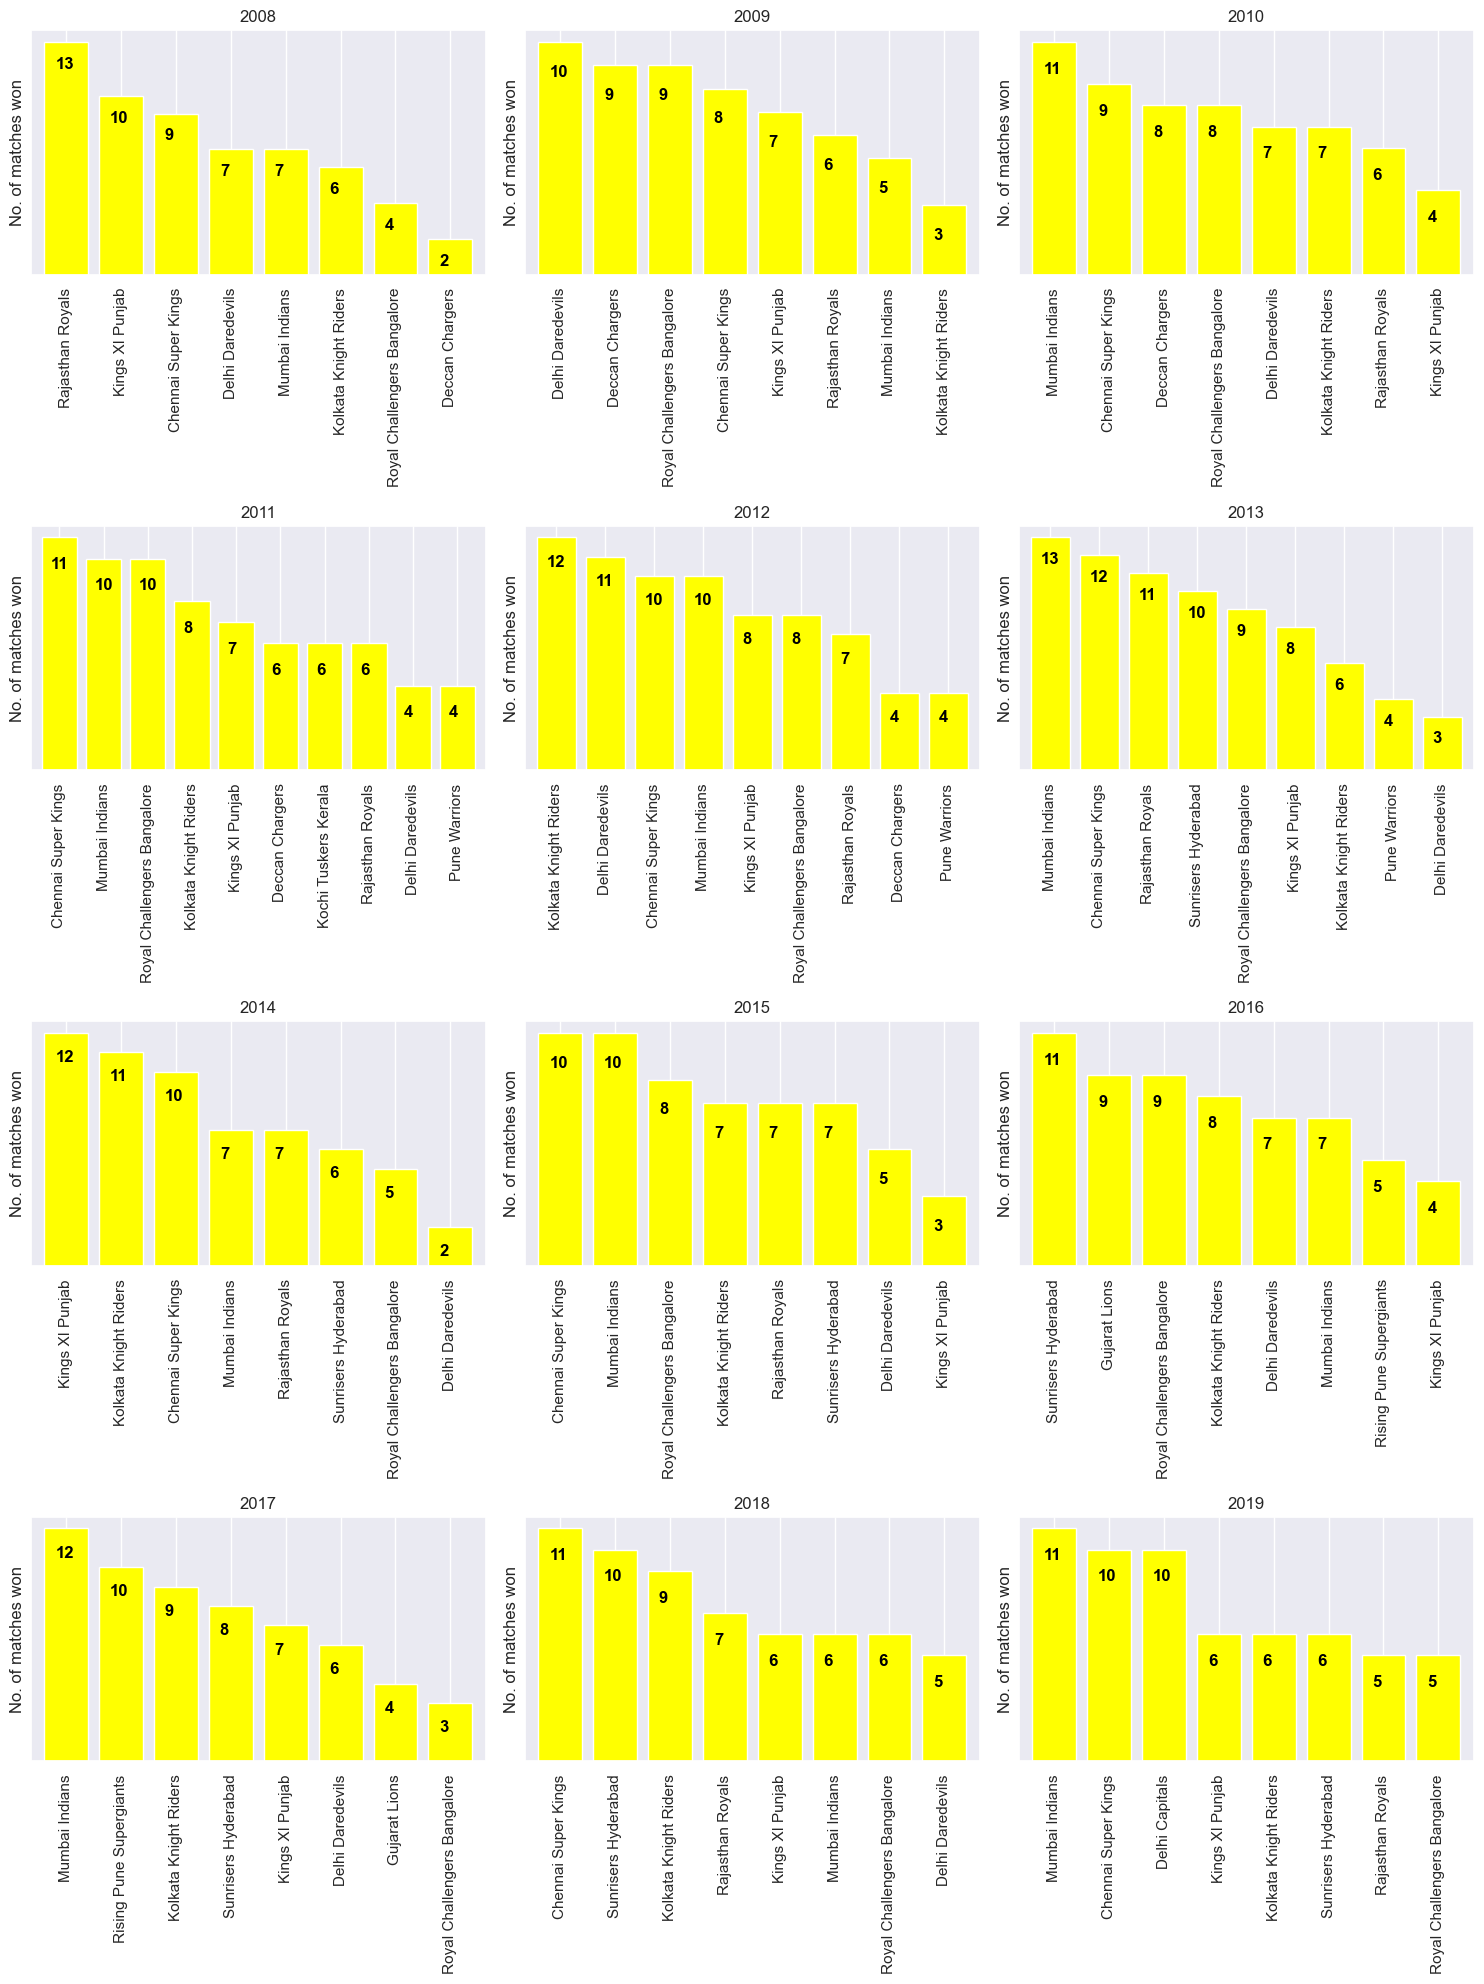

In [30]:
groups = winner_by_season.groupby('season')
fig = plt.figure()
count = 1

for year, group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (15,20), width = 0.8,color='yellow')
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('No. of matches won')
    
    total_of_matches = []
    for i in ax.patches:
        total_of_matches.append(i.get_height())
    total = sum(total_of_matches)
    
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

* **5. Champion in each season**

In [31]:
season_winner = matches.drop_duplicates('season', keep='last')
season_winner = season_winner[['season', 'winner']]
season_winner.sort_values('season',inplace=True)
season_winner.reset_index(inplace=True, drop=True)
season_winner

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


* The team with the most championships between the seasons of 2008-2019 is Mumbai Indians.

* **6. Visualization of how many finals which team played and how many of these matches they won.**

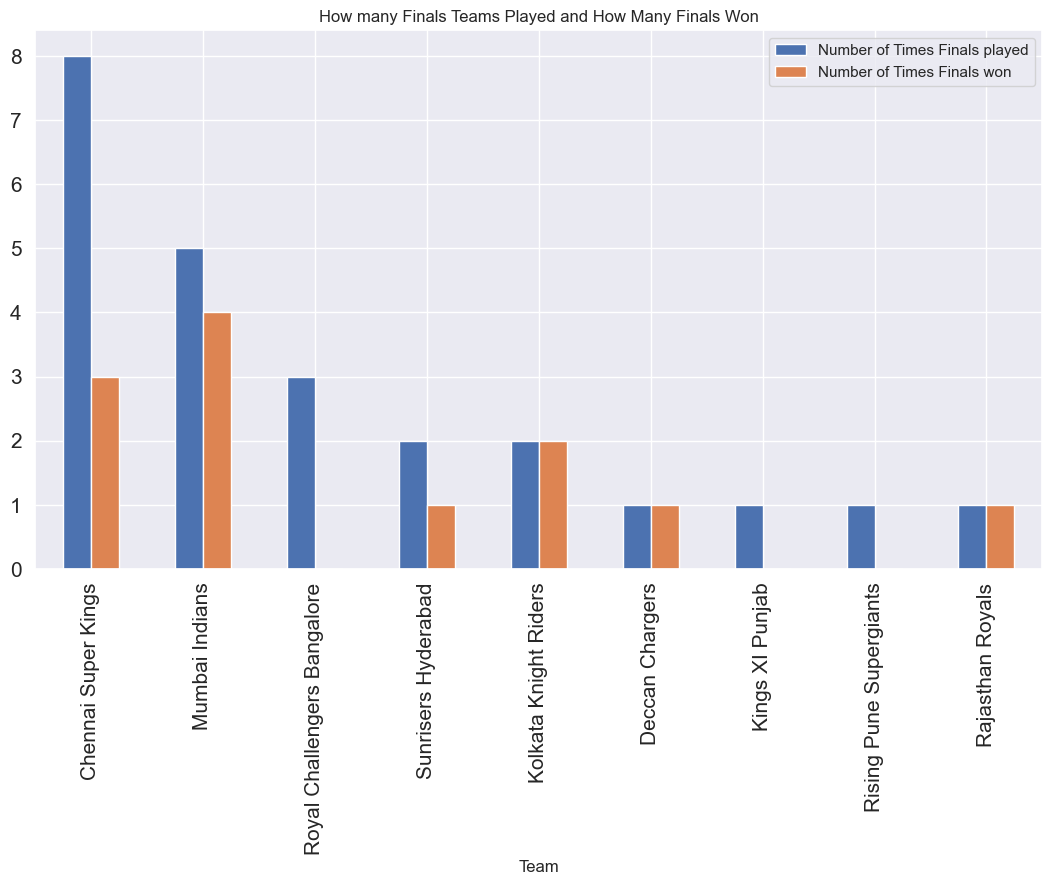

In [32]:
finals = matches.drop_duplicates('season', keep='last')
finals = finals[['season', 'team1', 'team2', 'winner', ]]

# Teams who reaches maximum number of finals
most_finals = pd.concat([finals['team1'], finals['team2']])
most_finals = most_finals.value_counts().reset_index()
most_finals = pd.DataFrame(most_finals)
most_finals.columns = ['Team', 'Number of Final']

# Teams who won the final.
win_finals = finals['winner'].value_counts().reset_index()
win_finals = pd.DataFrame(win_finals,)

most_finals = most_finals.merge(win_finals, left_on='Team',right_on='index', how='outer')
most_finals.drop('index', axis=1,inplace=True)
most_finals.set_index('Team', drop=True, inplace=True)
most_finals.columns = ['Number of Times Finals played', 'Number of Times Finals won']
most_finals.plot(kind='bar', figsize=(13,7),fontsize=15, title='How many Finals Teams Played and How Many Finals Won')
plt.show()

* Although Chennai Super Kings played a lot of finals, their ability to win the final match is low.
* Mumbai Indians won the most in the finals.

* **7. Visualizing the number of matches held in each city.**

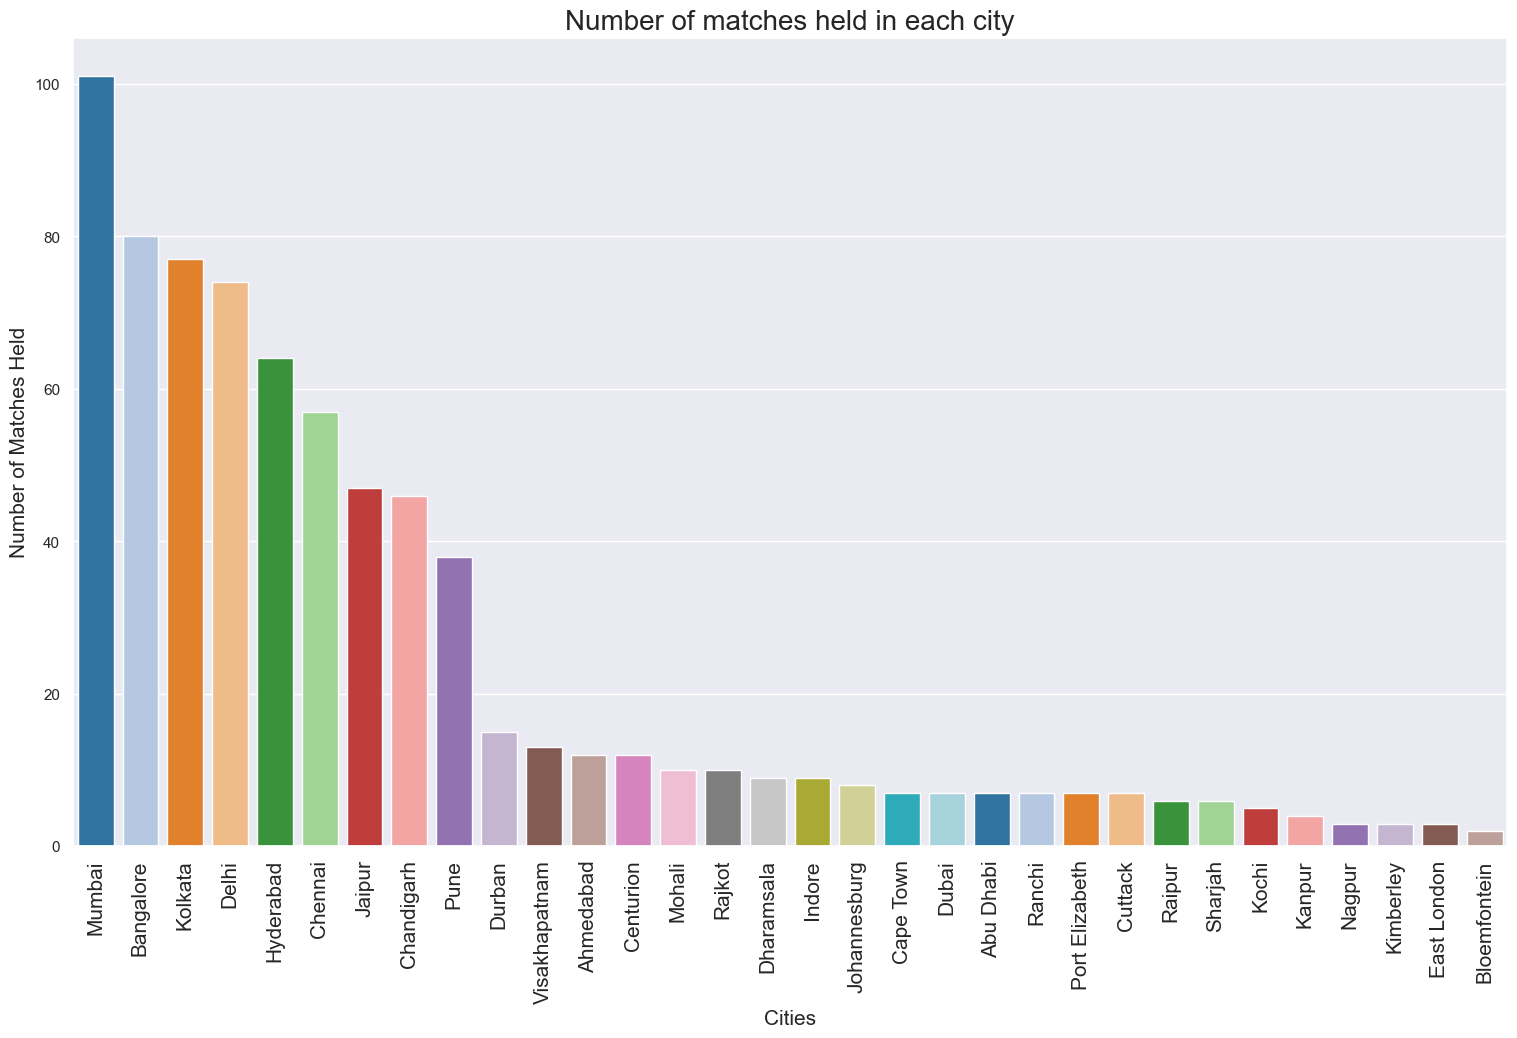

In [33]:
# Visualizing how many matches were played in which city.
plt.subplots(figsize=(18.5,10.5))
sns.countplot(x = 'city', data = matches, palette = 'tab20', order=matches['city'].value_counts().index)
plt.ylabel('Number of Matches Held',fontsize=15)
plt.title('Number of matches held in each city',fontsize=20)
plt.xlabel('Cities',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.show()

* Mumbai was observed as the city with the most played.
* Other favorite cities are Bangalore, Kolkate, Delhi.

In [34]:
# Picking the top 10 players based on the no. of Man of Match (MOM) awards won
mom=matches['player_of_match'].value_counts()[:10]
mom

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

* **8. Plot to visualise the top 10 players based on the number of MOM awards won**

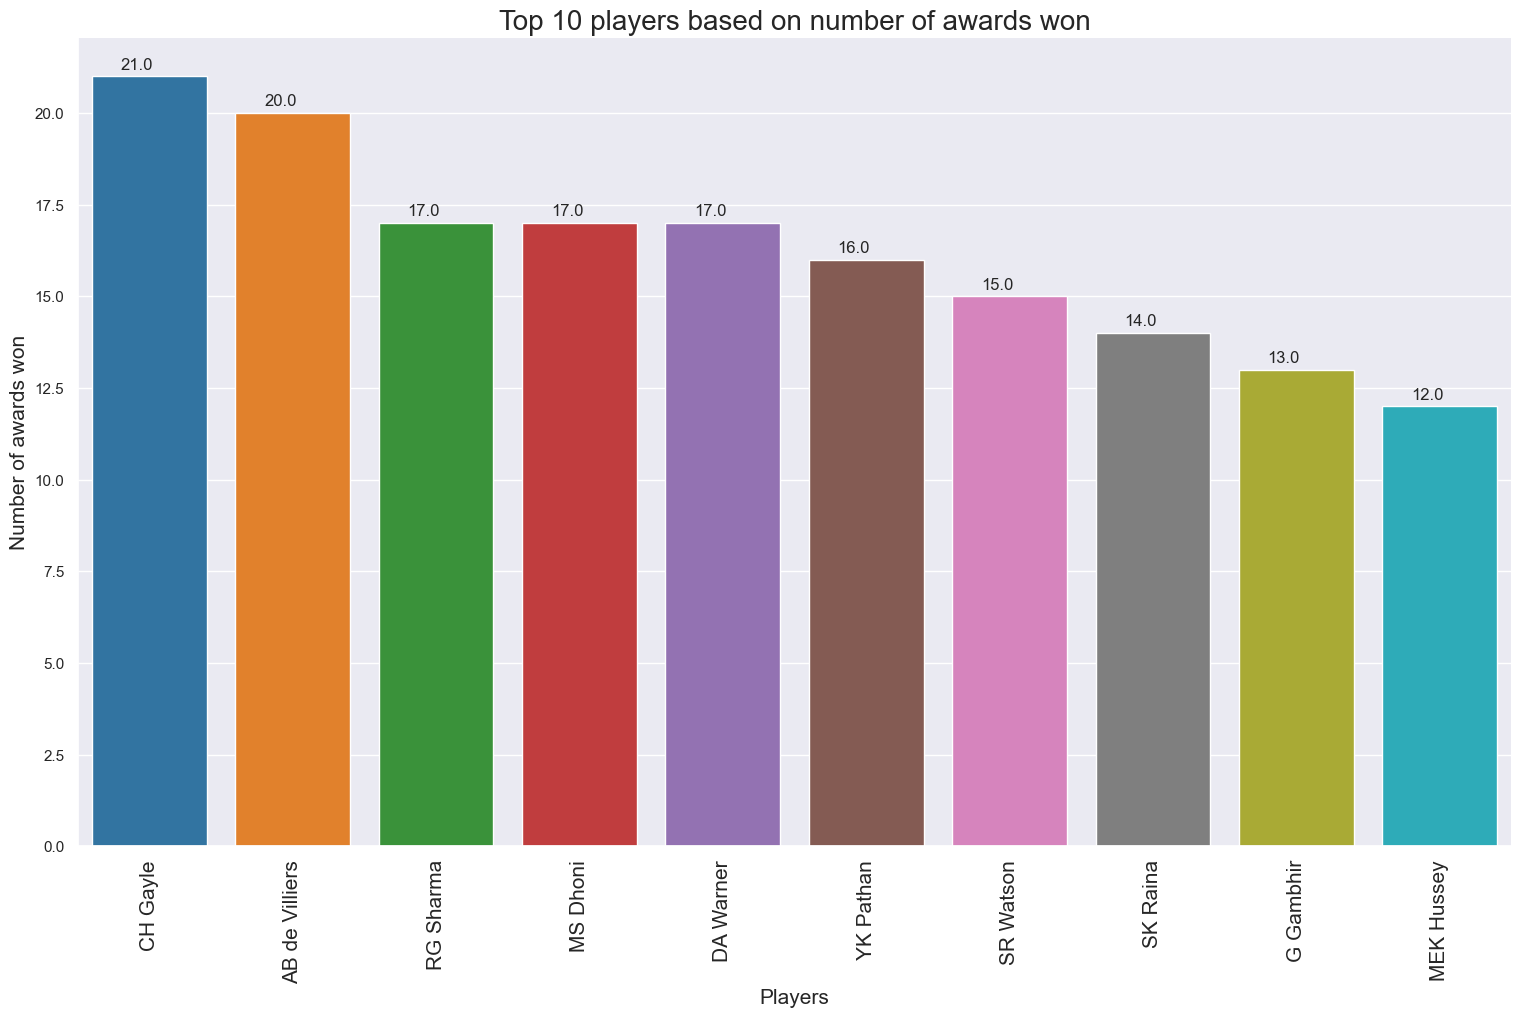

In [35]:
# Plot to visualise the top 10 players based on the number of MOM awards won
plt.subplots(figsize=(18.5,10.5))
ax = sns.barplot(x = mom.index, y = mom,orient='v', palette = 'tab10')
plt.ylabel('Number of awards won',fontsize=15)
plt.title('Top 10 players based on number of awards won',fontsize=20)
plt.xlabel('Players',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.2))       
plt.show()

* CH Gayle is the player with the most man of the match award.
* It is followed by AB de Villiers.

* **9. Visualizing the number of matches held in each venues.**

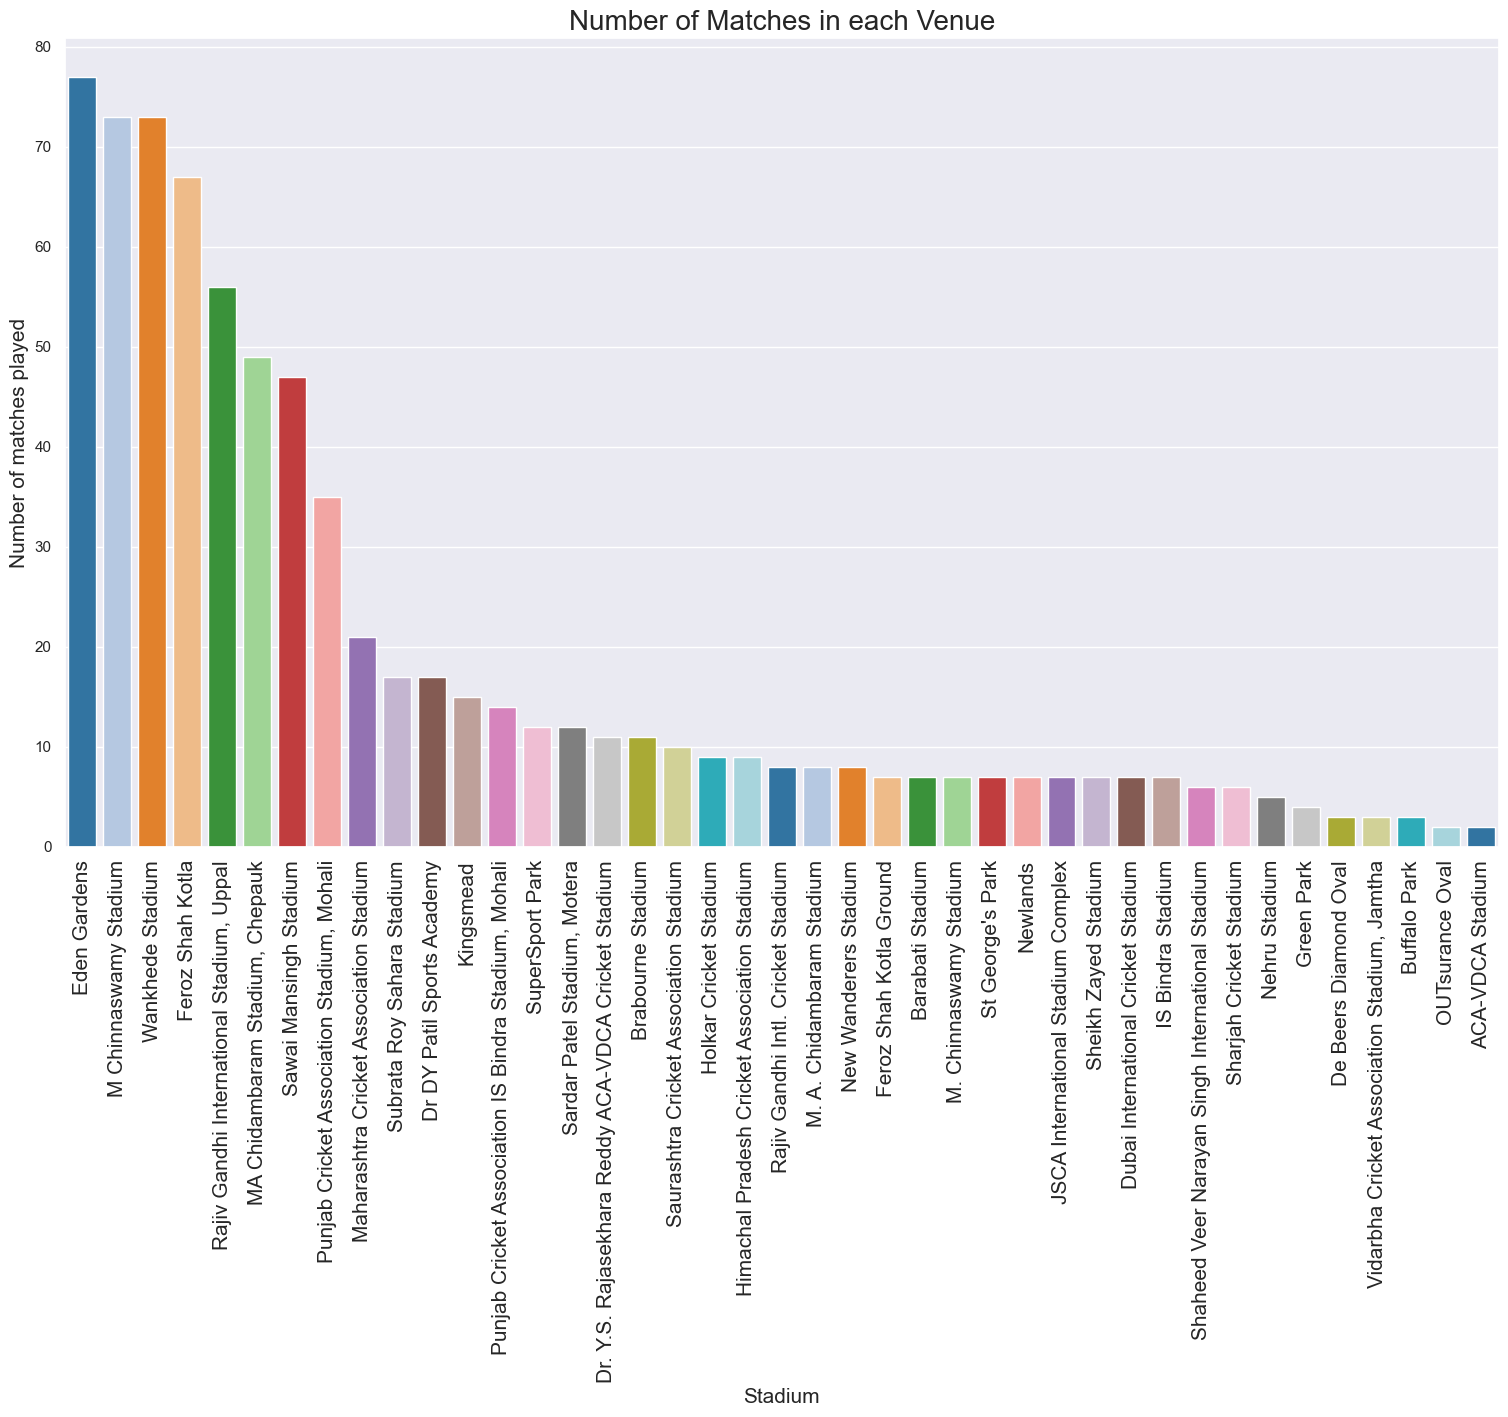

In [36]:
# Visualization of how many matches were played in which venue.
plt.subplots(figsize=(18.5,10.5))
sns.countplot(x = 'venue', data = matches, palette = 'tab20', order=matches['venue'].value_counts().index)
plt.ylabel('Number of matches played',fontsize=15)
plt.title('Number of Matches in each Venue',fontsize=20)
plt.xlabel('Stadium',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.show()

* The maximum matches played on Eden Gardens Stadium
* Other favorite stadiums are Wankhede, M. Chinnaswamy Stadium.

* **10. Observing the effect of the field situation on the winning for the 10 stadiums with the most matches**

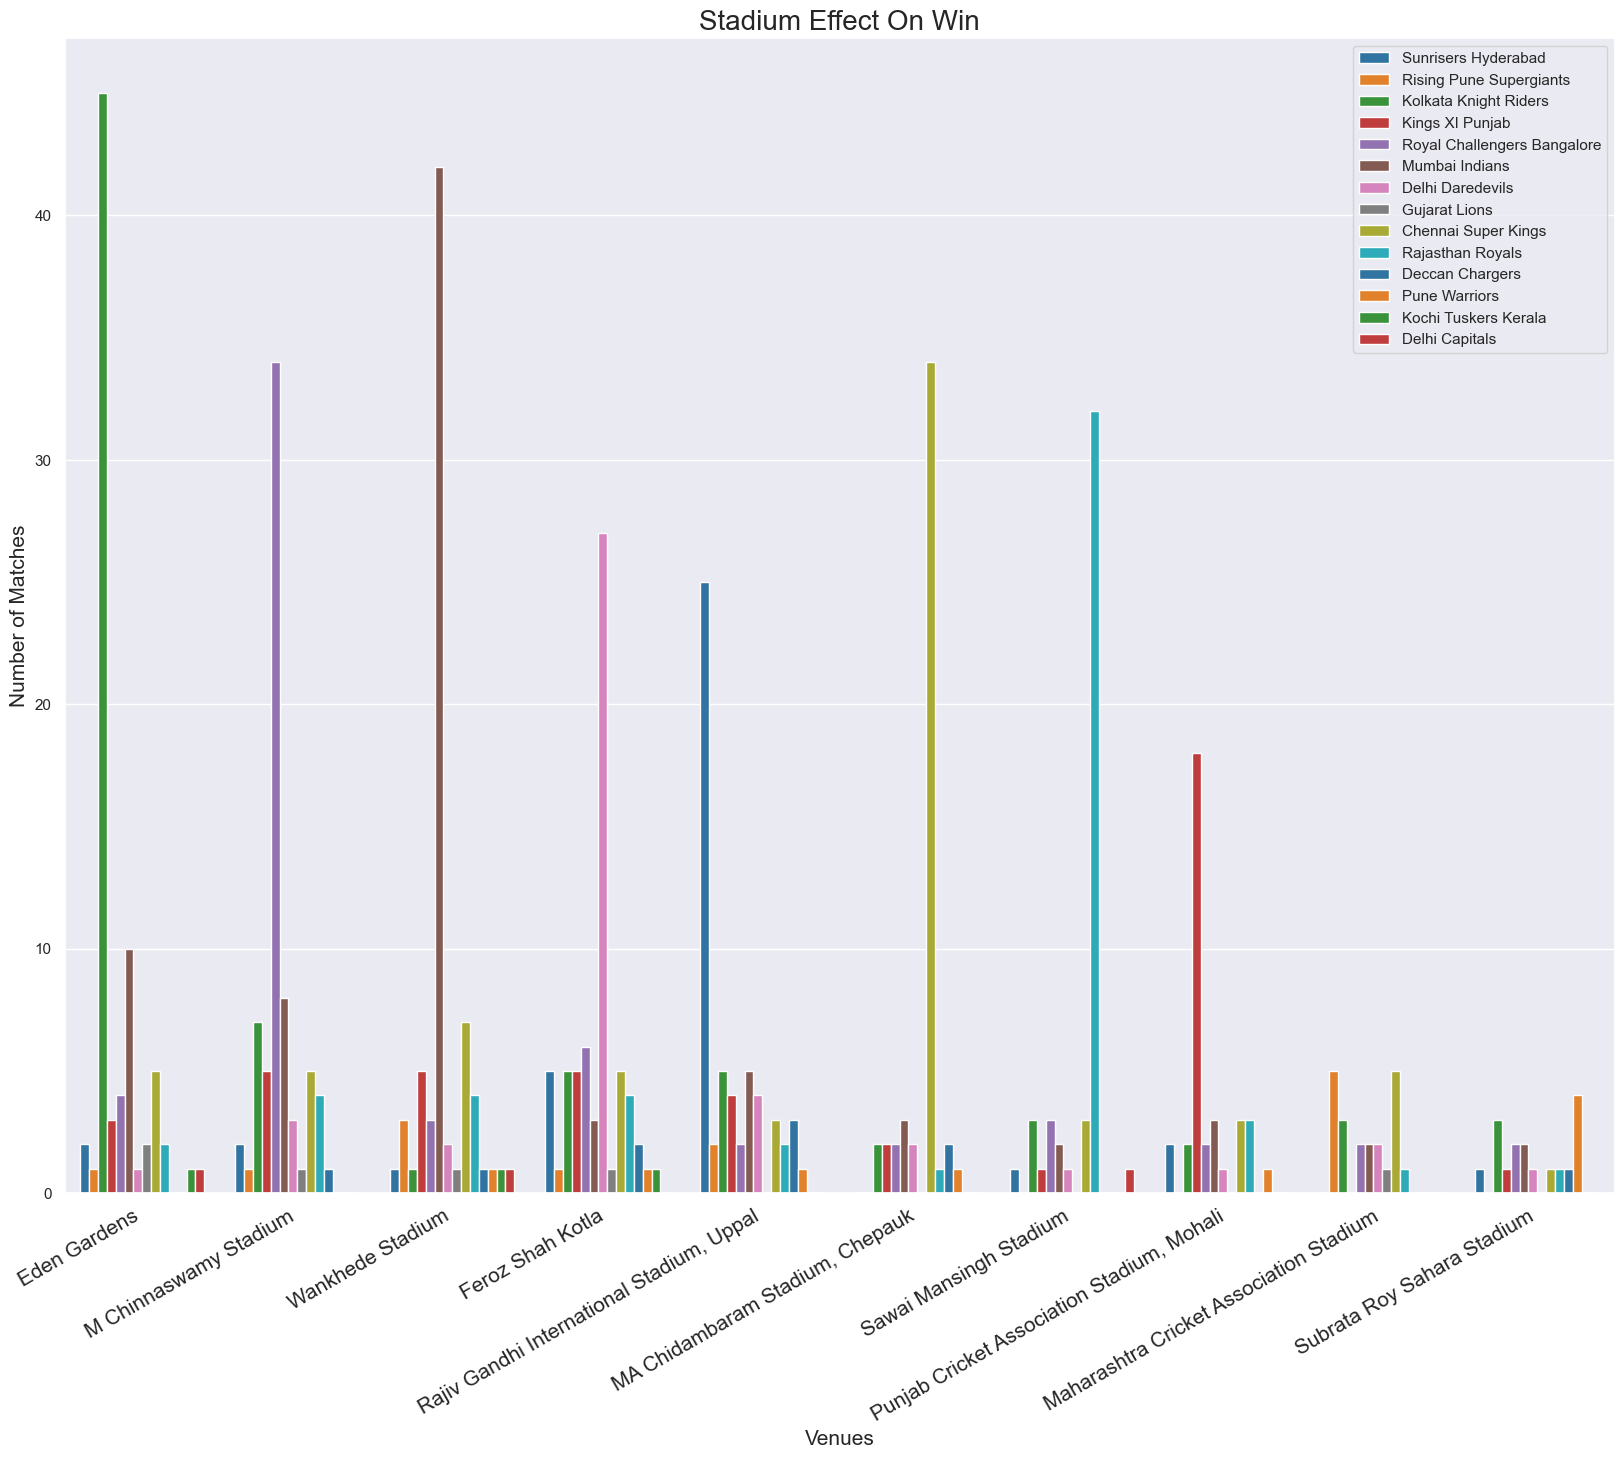

In [37]:
plt.figure(figsize = (20,15))
ax = sns.countplot(x='venue', data = matches, hue = 'winner',order=matches['venue'].value_counts().iloc[:10].index,palette='tab10')
plt.xticks(rotation=30, ha = 'right',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xlabel('Venues',fontsize=15)
plt.title('Stadium Effect On Win',fontsize=20)
plt.legend(loc='upper right')
plt.show()

* Particularly striking here is that Mumbai Indian's number of victories is as low as 10 in Eden Gardens, the stadium where the most games are played. Because Mumbai Indian is the team with the most wins.
* This shows that Mumbai Indians is not very good with the Eden Garden stadium, also due to the deplacement disadvantage.

* **11. Observing the effect of the field situation on the winning for the 10 cities with the most matches**

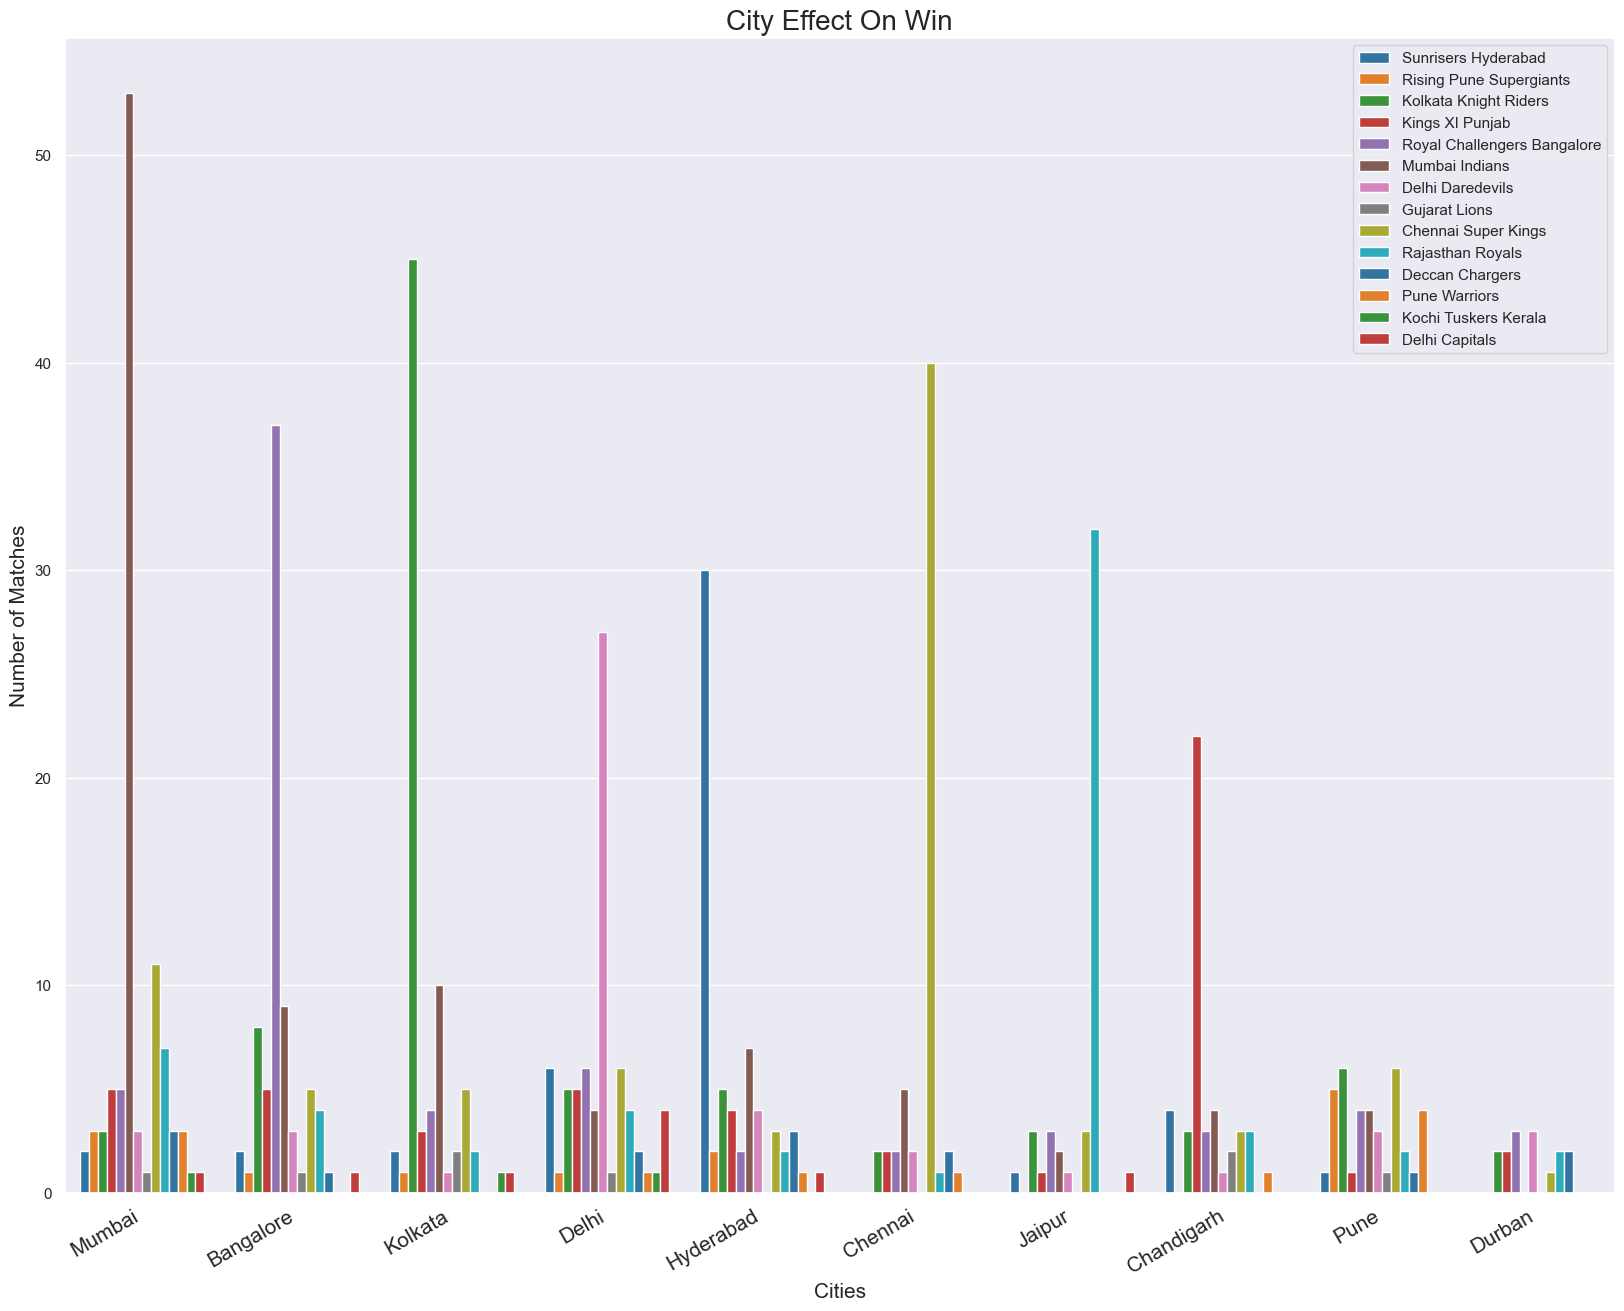

In [38]:
plt.figure(figsize = (20,15))
ax = sns.countplot(x='city', data = matches, hue = 'winner',order=matches['city'].value_counts().iloc[:10].index,palette='tab10')
plt.xticks(rotation=30, ha = 'right',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xlabel('Cities',fontsize=15)
plt.title('City Effect On Win',fontsize=20)
plt.legend(loc='upper right')
plt.show()

* Mumbai, the city of the Mumbai Indians team, stands out as the city with the most wins.

 **Match Winner Prediction**

* The team with the most points, both Toss Winner and Match Winner, is Chennai Super Kings.

* Merge 2 Dataset

In [39]:
df = pd.merge(matches, deliveries, left_on='id', right_on='match_id')

In [40]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


* **14. Total runs across each season**

In [41]:
# Getting total runs from each season
total_run = df.groupby(['season','match_id'])['total_runs'].sum().reset_index()
total_run = total_run.groupby(['season'])['total_runs'].sum().reset_index()
total_run

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


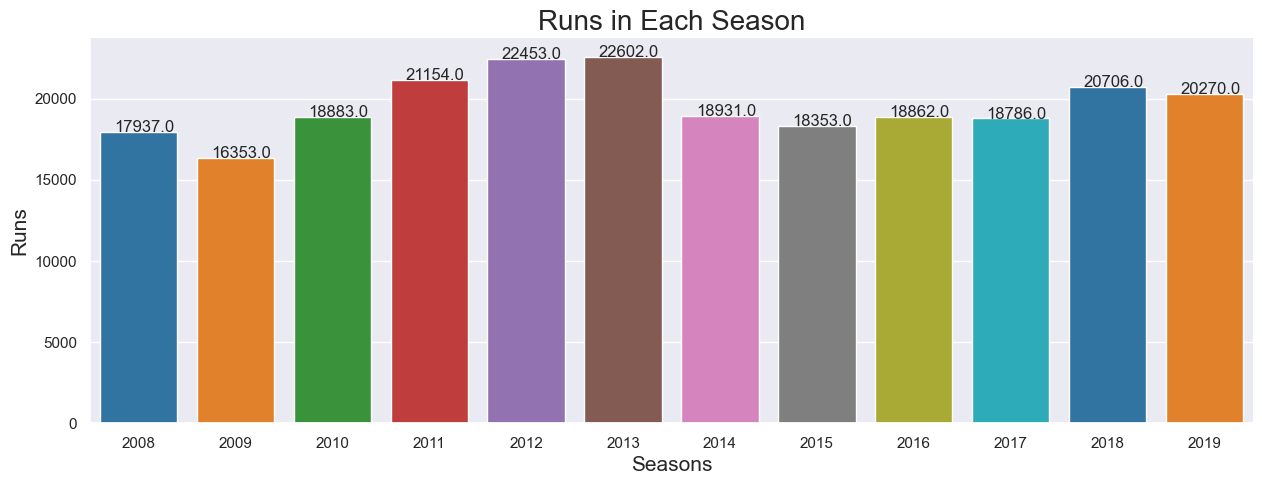

In [42]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='season', y='total_runs',data = total_run, palette = 'tab10')
plt.xlabel('Seasons',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs in Each Season',fontsize=20)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))   


plt.show()



* In 2011,2012,2013 more then 20000 runs were made.
* In each Season there were more then 15000 runs.
* Many runs in each season of IPL show that the matches are very competitive.

* **15. Total Runs score by each Team**

In [43]:
# Getting total runs from each teams
team_runs = df.groupby('batting_team')['total_runs'].sum().reset_index()
team_runs = team_runs.groupby(['batting_team'])['total_runs'].sum().reset_index()

In [44]:
team_runs

,batting_team,total_runs
0,Chennai Super Kings,26418
1,Deccan Chargers,11463
2,Delhi Capitals,2630
3,Delhi Daredevils,24388
4,Gujarat Lions,4862
5,Kings XI Punjab,27893
6,Kochi Tuskers Kerala,1901
7,Kolkata Knight Riders,27419
8,Mumbai Indians,29809
9,Pune Warriors,6358


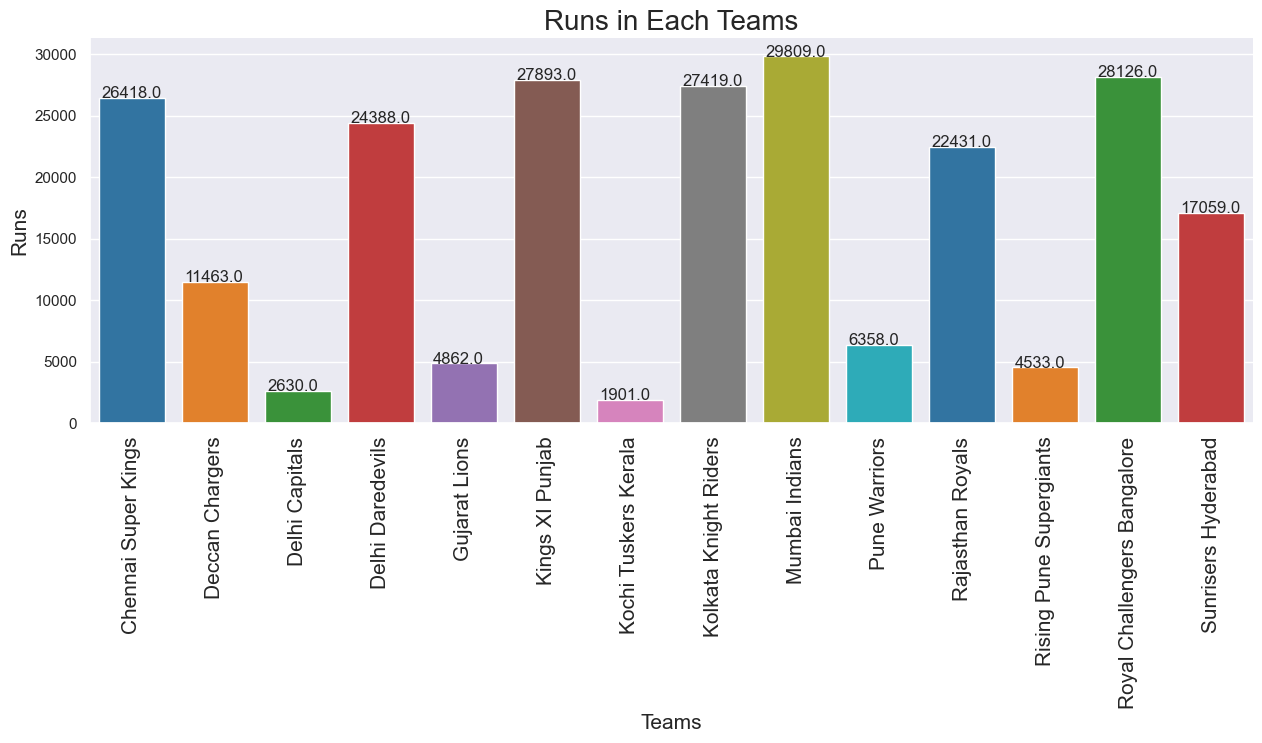

In [45]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='batting_team', y='total_runs',data = team_runs, palette = 'tab10')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs in Each Teams',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.5))   

plt.show()



* Mumbai Indians is the team with the most total runs.

* **16. Visualization of teams' runs according to 1st and 2nd Inning**

In [46]:
# Runs Distribution By each Team in 1st Inning and 2nd Inning
inning_run = df.groupby(['batting_team','match_id','inning', 'over'])['total_runs'].sum().reset_index()
inning_run = inning_run.groupby(['batting_team','inning'])['total_runs'].sum().reset_index()
inning_run = inning_run.drop(inning_run[inning_run.inning > 2 ].index)
inning_run[0:5]

,batting_team,inning,total_runs
0,Chennai Super Kings,1,14835
1,Chennai Super Kings,2,11574
3,Deccan Chargers,1,6765
4,Deccan Chargers,2,4698
5,Delhi Capitals,1,1019


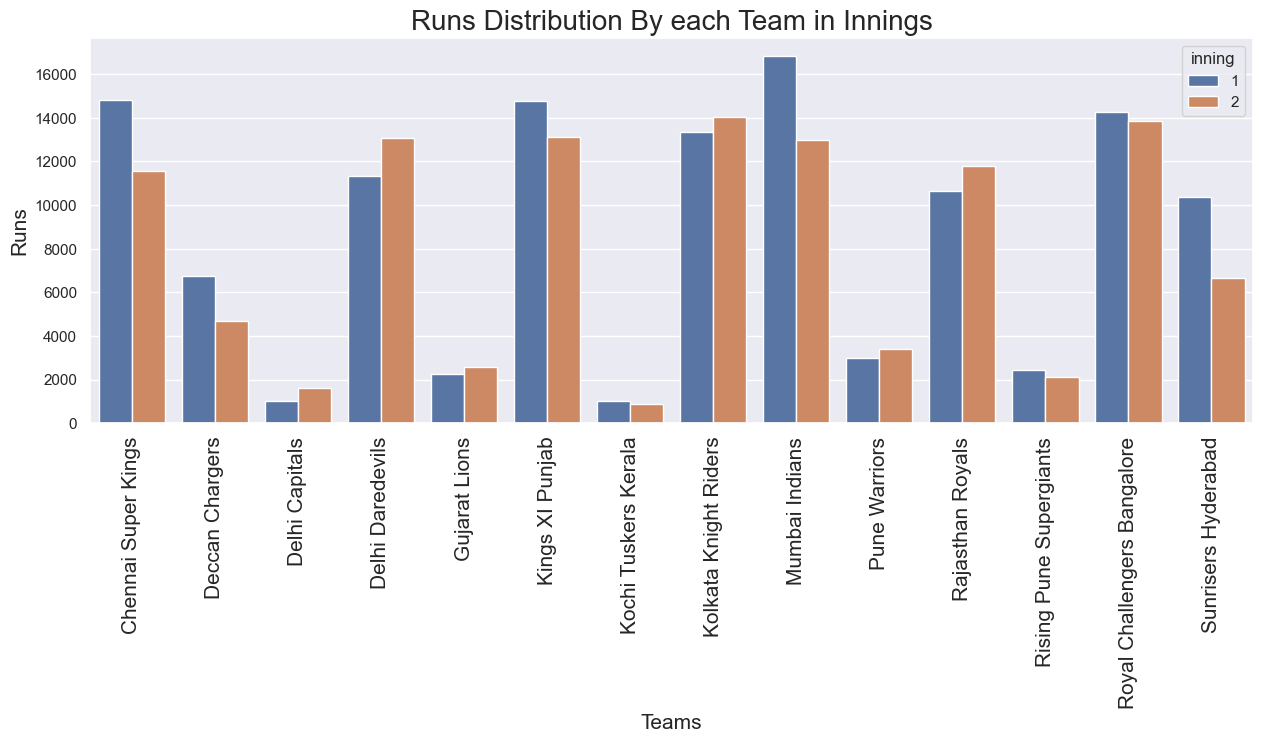

In [47]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='batting_team', y='total_runs',data = inning_run,hue='inning')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs Distribution By each Team in Innings',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()


* Among the teams with high wins, all except Kolkata Knight Riders are observed to have higher running in the 1st inning than the 2nd inning.
* For example, for teams with high wins such as Mumbai Indians, Chenai Super Kings, Royal Challengers Bangalore, the run in 1st Inning is higher.

* **17. Top 10 Batsman with most number of Fours**

In [48]:
batsman = df['batsman'].unique()
batsman[:5]

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda'], dtype=object)

In [49]:
def check_fours(x): # Counting number of fours
    global count
    if x==4:
        count+=1

In [50]:
count=0
batsman_fours = []       # This list will contain the fours amount numbers of each batsman hitting.
for i in batsman:
    temp_df = df[df['batsman']==i]
    temp_df['batsman_runs'].apply(check_fours)
    batsman_fours.append(count)
    count=0

In [51]:
df_fours = pd.DataFrame(data={'Batsman':batsman, 'Fours':batsman_fours})
df_fours.sort_values('Fours', inplace=True,ascending=False,)
df_fours.reset_index(drop=True, inplace=True)
df_fours = df_fours[:10]

df_fours

,Batsman,Fours
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


In [52]:
# Ranking of players by fours amount.
df_fours.T

,0,1,2,3,4,5,6,7,8,9
Batsman,S Dhawan,SK Raina,G Gambhir,V Kohli,DA Warner,RV Uthappa,RG Sharma,AM Rahane,CH Gayle,PA Patel
Fours,526,495,492,482,459,436,431,405,376,366


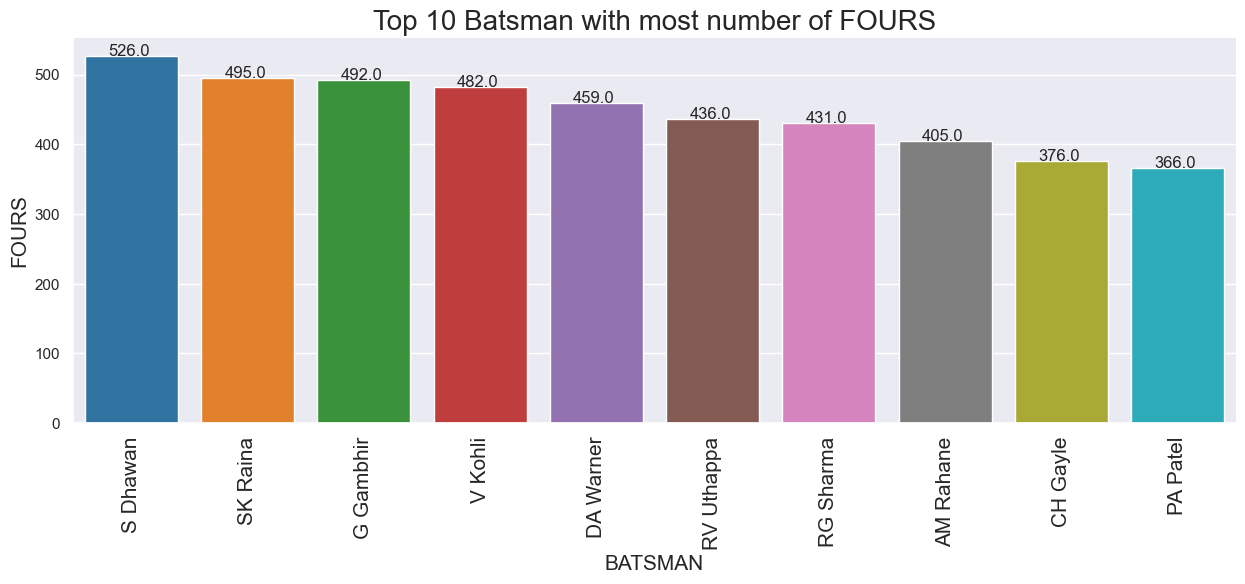

In [53]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='Batsman', y='Fours',data = df_fours, palette = 'tab10')
plt.xlabel('BATSMAN',fontsize=15)
plt.ylabel('FOURS',fontsize=15)
plt.title('Top 10 Batsman with most number of FOURS',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))   

plt.show()

*  G Gambhir came in first with 484 fours, followed by SK Raina.
* V Kohli is in 4th place with 384 fours.
* CH Gayle, the top scorer, is 9th place on the top 10 players that have the most fours.

* **18. Top 10 Batsman with most number of Sixes**

In [54]:
def check_sixes(x): # Counting number of fours
    global count
    if x==6:
        count+=1

In [55]:
count=0
batsman_sixes = []       # This list will contain the fours amount numbers of each batsman hitting.
for i in batsman:
    temp_df = df[df['batsman']==i]
    temp_df['batsman_runs'].apply(check_sixes)
    batsman_sixes.append(count)
    count=0

In [56]:
df_sixes = pd.DataFrame(data={'Batsman':batsman, 'Sixes':batsman_sixes})
df_sixes.sort_values('Sixes', inplace=True,ascending=False,)
df_sixes.reset_index(drop=True, inplace=True)
df_sixes = df_sixes[:10]

df_sixes

,Batsman,Sixes
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


In [57]:
# Ranking of players by fours amount.
df_sixes.T

,0,1,2,3,4,5,6,7,8,9
Batsman,CH Gayle,AB de Villiers,MS Dhoni,SK Raina,RG Sharma,V Kohli,DA Warner,SR Watson,KA Pollard,YK Pathan
Sixes,327,214,207,195,194,191,181,177,175,161


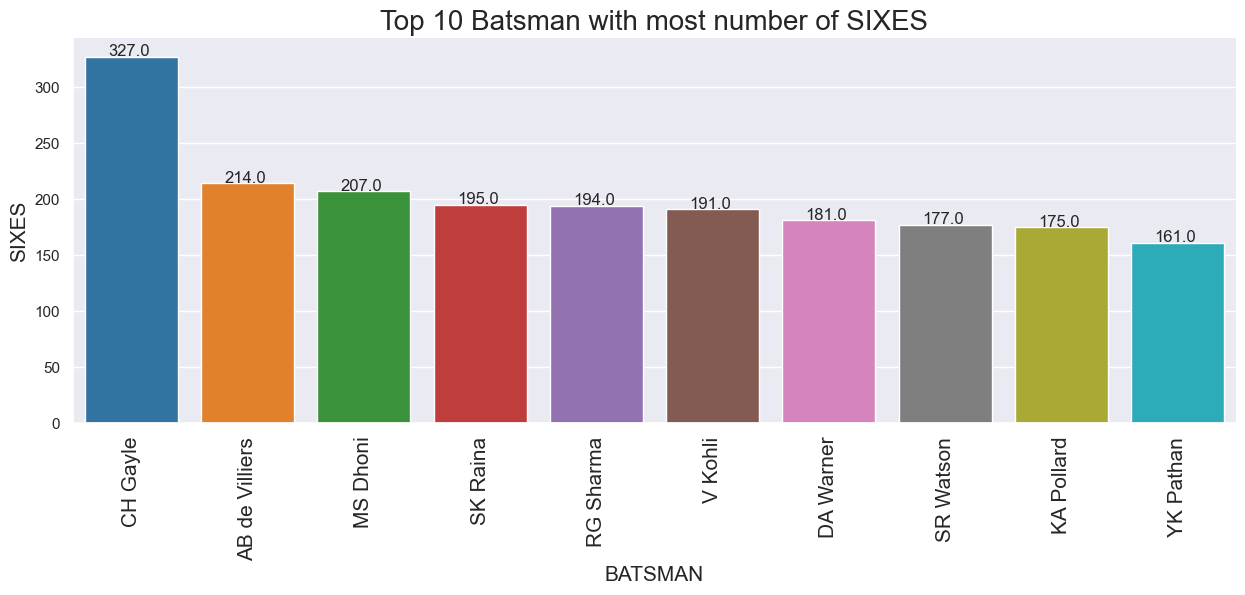

In [58]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='Batsman', y='Sixes',data = df_sixes, palette = 'tab10')
plt.xlabel('BATSMAN',fontsize=15)
plt.ylabel('SIXES',fontsize=15)
plt.title('Top 10 Batsman with most number of SIXES',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))   

plt.show()

* CH Gayle tops the list as expected.
* Although AB de Villiers is not in the fours, it is in the 2nd place in the sixes.
* Although MS Dhoni is not in the fours, it is in the 3rd place in the sixes.

* **19. Top 10 Batsman with most number of dot balls.**

In [59]:
def check_dots(x): # Counting number of fours
    global count
    if x==0:
        count+=1

In [60]:
count=0
batsman_dots = []       # This list will contain the fours amount numbers of each batsman hitting.
for i in batsman:
    temp_df = df[df['batsman']==i]
    temp_df['batsman_runs'].apply(check_dots)
    batsman_dots.append(count)
    count=0

In [61]:
df_dots = pd.DataFrame(data={'Batsman':batsman, 'Dots':batsman_dots})
df_dots.sort_values('Dots', inplace=True,ascending=False,)
df_dots.reset_index(drop=True, inplace=True)
df_dots = df_dots[:10]

df_dots

,Batsman,Dots
0,V Kohli,1493
1,S Dhawan,1455
2,CH Gayle,1423
3,RG Sharma,1390
4,RV Uthappa,1382
5,SK Raina,1381
6,G Gambhir,1351
7,DA Warner,1254
8,AM Rahane,1198
9,MS Dhoni,1111


In [62]:
# Ranking of players by fours amount.
df_dots.T

,0,1,2,3,4,5,6,7,8,9
Batsman,V Kohli,S Dhawan,CH Gayle,RG Sharma,RV Uthappa,SK Raina,G Gambhir,DA Warner,AM Rahane,MS Dhoni
Dots,1493,1455,1423,1390,1382,1381,1351,1254,1198,1111


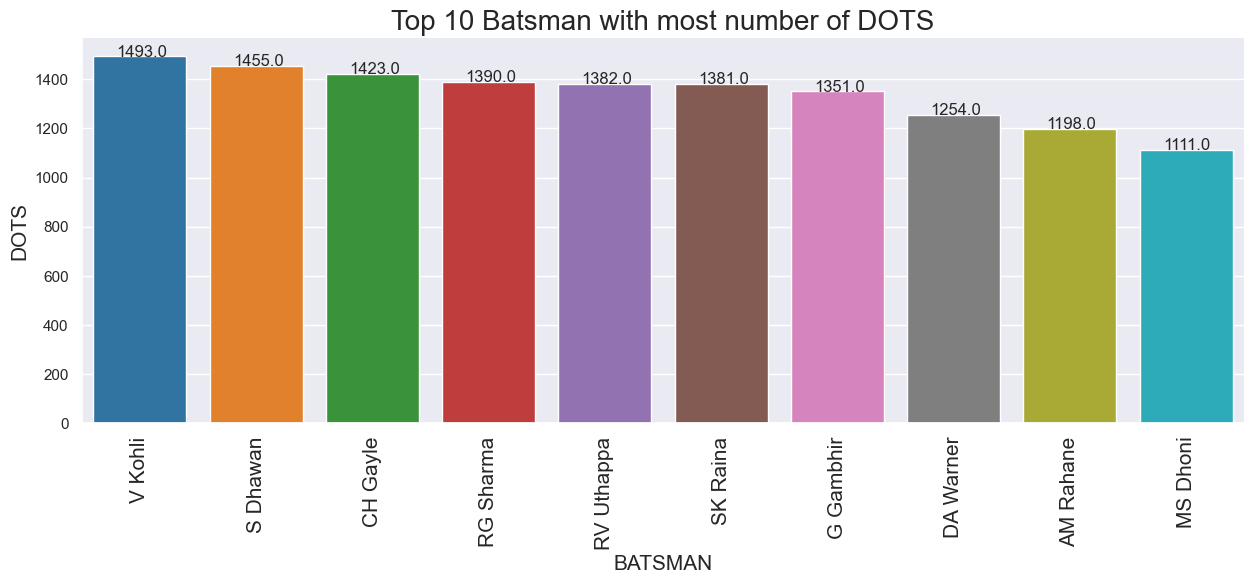

In [63]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='Batsman', y='Dots',data = df_dots, palette = 'tab10')
plt.xlabel('BATSMAN',fontsize=15)
plt.ylabel('DOTS',fontsize=15)
plt.title('Top 10 Batsman with most number of DOTS',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))   

plt.show()

* V Kohli tops the list, followed by S Dhawan and CH Gayle.

* **20. Top 10 Individuals Score**

In [64]:
individual  = df.groupby(['batsman','match_id'])['batsman_runs'].sum().reset_index()
individual.sort_values('batsman_runs',axis=0, inplace=True,ascending=False)
individual.drop('match_id',inplace=True,axis=1)
individual = individual[:10]

In [65]:
individual

,batsman,batsman_runs
1826,CH Gayle,175
1423,BB McCullum,158
357,AB de Villiers,133
8167,RR Pant,130
372,AB de Villiers,129
1818,CH Gayle,128
5439,M Vijay,127
2167,DA Warner,126
10660,V Sehwag,122
9723,SR Watson,121


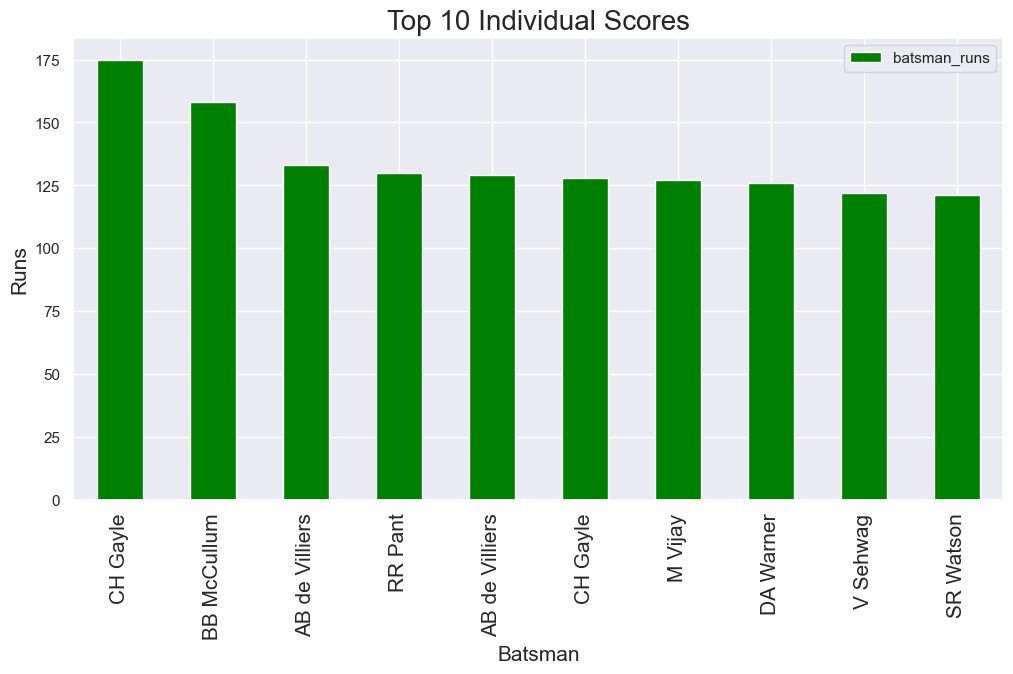

In [66]:
individual.plot(x='batsman', kind='bar', figsize=(12,6),color='green')
plt.xlabel('Batsman',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Top 10 Individual Scores',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

* The day CH Gayle hit 175 runs

* **21. Top 10 Bowler who bowled Maximum bowls in IPL**

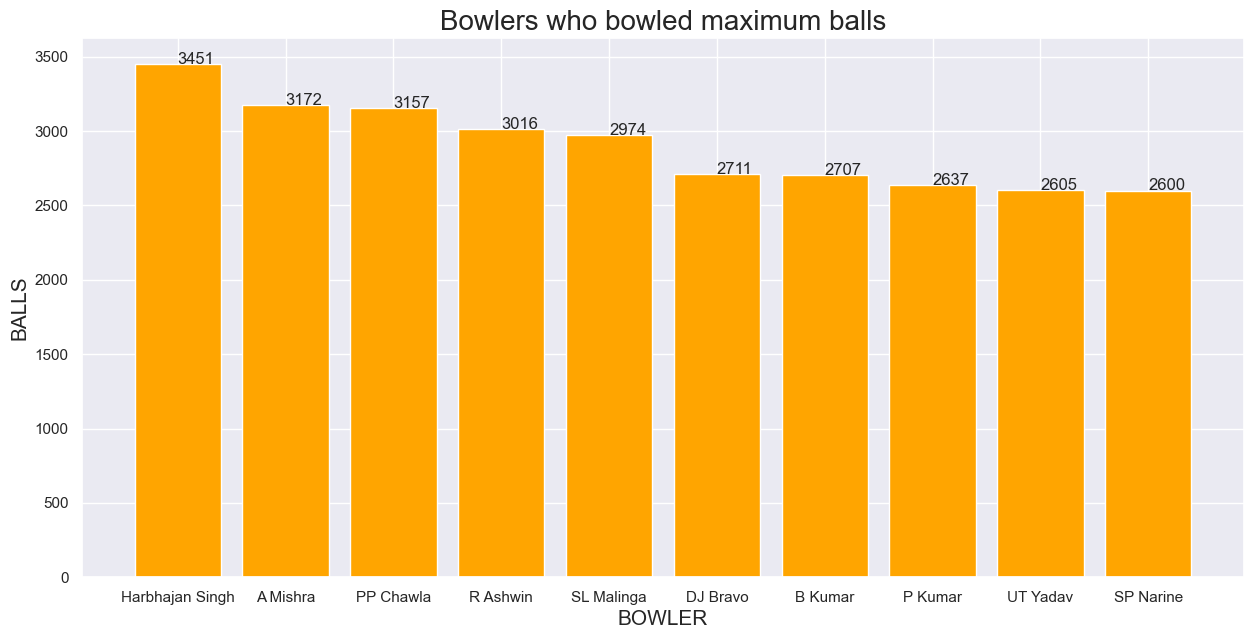

In [67]:
bowler = df['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=bowler.index, height=bowler.values,color='orange')

plt.title('Bowlers who bowled maximum balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(bowler.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 

* Harbhajan Singh bowled maximum balls.

* **22. Top 10 Bowlers with maximum number of Dot Balls**

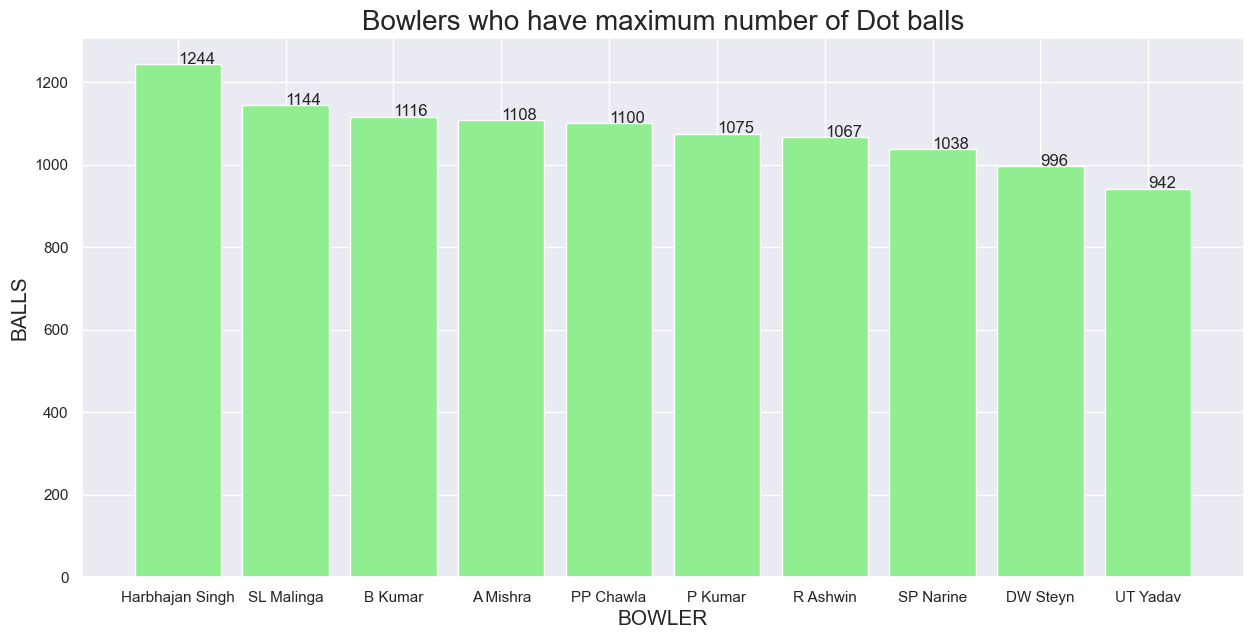

In [68]:
dot_ball = df[df['total_runs']==0]
dot_ball = dot_ball['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=dot_ball.index, height=dot_ball.values,color='lightgreen')

plt.title('Bowlers who have maximum number of Dot balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(dot_ball.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 


* Harbhajan Singh also bowled maximum Dot balls.

* **23. Top 10 Bowlers with maximum number of extras**

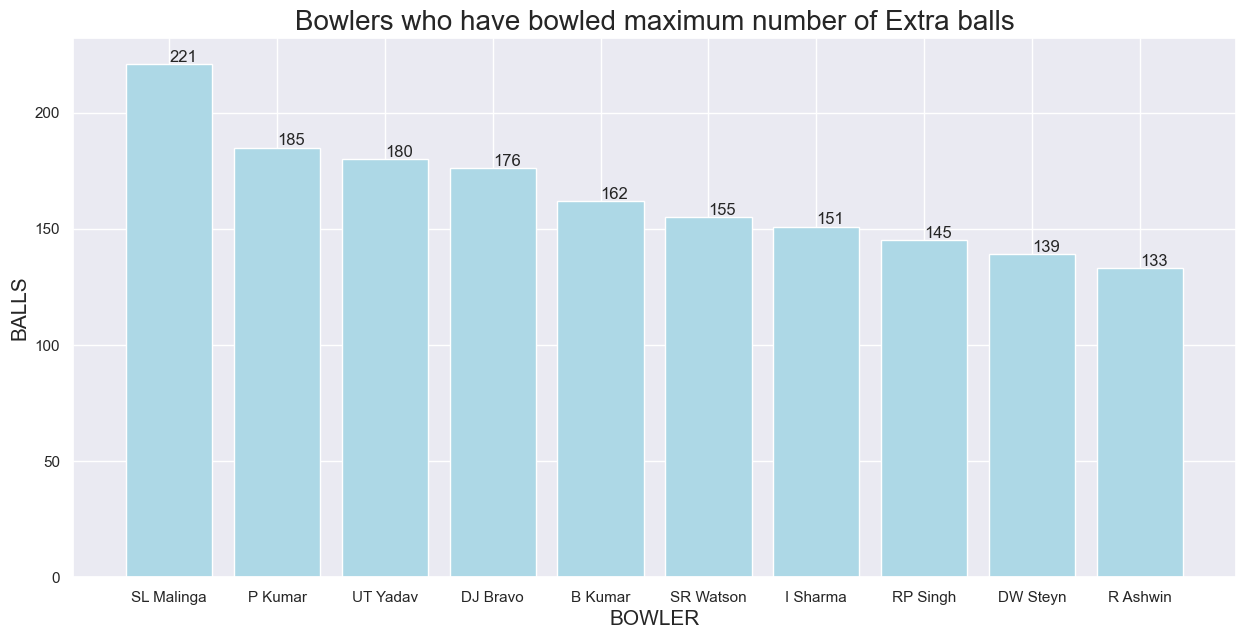

In [69]:
extra_runs = df[df['extra_runs']!=0]
extra_runs = extra_runs['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=extra_runs.index, height=extra_runs.values,color='lightblue')

plt.title('Bowlers who have bowled maximum number of Extra balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(extra_runs.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 


* SL Malinga bowled maximum Extra balls.

 **Results**
* In the final matches, some teams had a very low win rate, so it is important for the championship to come to the final and not give up.
* In general, it has been observed that the number of wins is higher when toss_decision is 'field'.
* The teams with higher toss_winner are the teams with more wins.
* The place where the match is played is very effective for victory. Especially some teams may have displacement phobia.
* It is very important to have effective players, that is, players with high statistics.
* The teams that can be recommended for companies for the teams with high number of wins and champions in recent years are: Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders.
* The recommended bowler for companies could be: SL Malinga, Herbajan Singh, B.Kumar, A.Mishra.
* Players as recommended batman for companies could be: CH Gayle, BB MccOllum, AB de Villiers, V Kohli, S Dhawan, SK Raina.

In [70]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
# Prepare the data for training
# Assuming you have already preprocessed and cleaned the data

# Select the features that will be used for prediction
features = ['team1', 'team2', 'venue', 'toss_winner', 'toss_decision']

In [72]:
# Create a new DataFrame with only the selected features
data = matches[features]

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data)



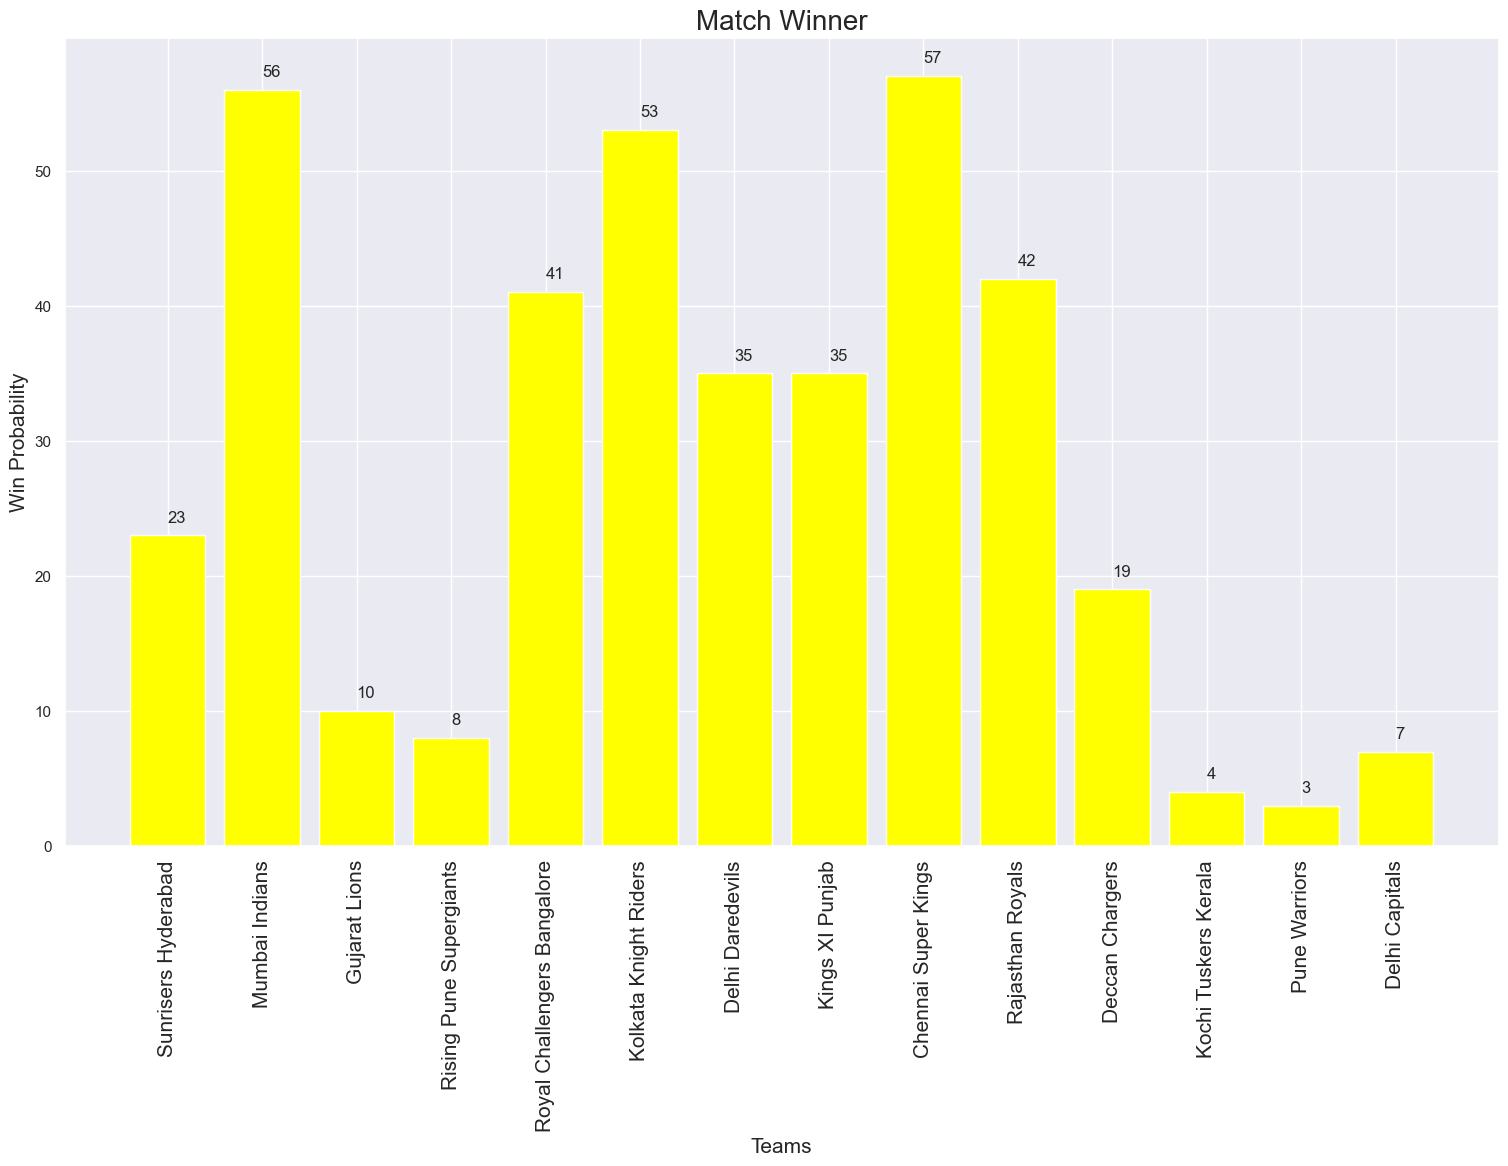

In [73]:
team = matches['team1'].unique()

toss_match_winner = []
for var in team:
    count = matches[(matches['toss_winner'] == var) & (matches['winner'] == var)]['id'].count()
    toss_match_winner.append(count)

    
    
plt.figure(figsize=(18.5,10.5))
plt.bar(x=team, height=toss_match_winner,color='yellow')
plt.xticks(rotation=90,fontsize=15)
plt.title('Match Winner',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Win Probability',fontsize=15)

for i,v in enumerate(toss_match_winner):   
    plt.text(x=i, y=v+1, s=v)
plt.show()